# Car Price Modelling Using Linear Regression
- Naresh Dogra 
- Upgrad Cohort 2018

### Project Description:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

##### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

##### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

### Step_1 : Importing and Understanding Data


In [676]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
pd.options.display.max_rows=500
pd.options.display.max_columns=500
pd.options.display.max_info_columns = 500


folder = Path('C:/Upgrad Projects/CarPriceModelling_LR')

DFCarPrices = pd.read_csv(folder/'CarPrice_Assignment.csv')

In [677]:
DFCarPrices.info()
print(DFCarPrices.isnull().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [678]:
DFCarPrices.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [679]:
DFCarPrices.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


Dataset quality:
- The dataset in gneeral looks good. There are total 204 records.
- There are no Null values in any of the columns.
- All columns have equal number of values present.

Dependent and Independent variables:
- Dependent Variable = price
- There are 25 other Features, Car_ID variable is merely used for sequencing.

Variable Types:
- Most of the variables are of numerical type, float or int. 
- Below variables are of categorical type
    1. Symboling
    2. CarName
    3. fueltype
    4. aspiration
    5. doornumber
    6. carbody
    7. drivewheel
    8. enginelocation
    9. enginetype
    10. cylindernumber [this is just a number in words]
    11. fuelsystem

We will convert these categorical variables to dummy variables if required as per analysis.

### Step_2 Data Cleaning

In [680]:
# Make all column names lowercase
DFCarPrices.columns = DFCarPrices.columns.str.lower()
DFCarPrices.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [681]:
# Convert all string type columns to lowercase
DFCarPrices = DFCarPrices.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)

# Check if there are no invalid values after conversion operation
print(DFCarPrices.isnull().any().any())

False


In [682]:
# Variable 'carname' comprises two parts namely 'car company' and 'car model'. 
# For this modelling excercise we will consider only 'car name'

DFCarPrices.loc[:, 'car_name'] = DFCarPrices['carname'].apply(lambda x: x.split(" ")[0])
DFCarPrices.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [683]:
# Now that we have 'car_name' variable, drop 'carname' column
DFCarPrices.drop(['carname'], axis=1, inplace=True)

In [684]:
# Rename the  variable 'car_name' to 'carname' as it was in original dataset
DFCarPrices.rename(columns={'car_name': 'carname'}, inplace=True)

In [685]:
# Check if carname values are all unique
DFCarPrices.groupby(['carname']).size()

carname
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
dtype: int64

There are some car names which appear to be same but spelled differently. 
First convert all names to lowercase and then we can correct as below, 
- maxda = mazda
- porcshce = porsche
- toyouta = toyota
- vokswagen = volkswagen
- vw = volkswagen

In [686]:
# convert all carname values to lowercase for uniformity
DFCarPrices['carname'] = DFCarPrices['carname'].str.lower()
DFCarPrices.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [687]:
# Lets perform the replacements for incorrectly spelled or abbreviated carname values
DFCarPrices.carname.replace({'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}, inplace=True)
DFCarPrices.groupby(['carname']).size()

carname
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
dtype: int64

In [688]:
# Let's check if there are any duplicate rows
DFCarPrices[DFCarPrices.duplicated()]

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname


In [689]:
# Variable fuelsystem
DFCarPrices.groupby(['fuelsystem']).size()

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
dtype: int64

Research shows that fuel systems are of type 
- Single-point or throttle body injection
- Spark Plug Fuel Injector
- Port or multipoint fuel injection
- Sequential fuel injection
- Direct injection

As per given dataset, values as
- mpfi = multi-point fuel injection and 
- spfi = "sequential port fuel injection" or "spark plug fuel injector"
- idi= indirect injection
- nbbl = n-barrel carburetors (1/2/4) 
- spdi = Single Point Direct Injection (possibly)

Looks like some 'mpfi' values are mis-spelled as 'mfi'. 

Also, tere is only 1 record with value as 'spfi. But, will not change this to similar looking 'spdi' value even though there are 9 records with 'spdi' value. 'spfi' is quite a valid name for fuel system.


In [690]:
DFCarPrices[DFCarPrices['fuelsystem'].isin(['spfi', 'spdi'])]

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
46,47,2,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0,isuzu
79,80,1,gas,turbo,two,hatchback,fwd,front,93.0,157.3,63.8,50.8,2145,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0,mitsubishi
80,81,3,gas,turbo,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2370,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0,mitsubishi
82,83,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0,mitsubishi
83,84,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0,mitsubishi
84,85,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0,mitsubishi
87,88,1,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0,mitsubishi
88,89,-1,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0,mitsubishi
119,120,1,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957.0,plymouth
124,125,3,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0,plymouth


In [691]:
# Just trying to see fuel system values for 'isuzu' cars 
DFCarPrices[DFCarPrices['carname'].str.contains('isuzu')]

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
43,44,0,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785.0,isuzu
44,45,1,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5,isuzu
45,46,0,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5,isuzu
46,47,2,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0,isuzu


In [692]:
# Lets perform the replacements for mis-spelled fuelsystem value 'mfi'
DFCarPrices.fuelsystem.replace({'mfi':'mpfi'}, inplace=True)
DFCarPrices.groupby(['fuelsystem']).size()

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mpfi    95
spdi     9
spfi     1
dtype: int64

In [693]:
# lets prefix fuelsys to values as
DFCarPrices['fuelsystem'] = DFCarPrices['fuelsystem'].apply(lambda x: f"fuelsys_{x}")

DFCarPrices.groupby(['fuelsystem']).size()

fuelsystem
fuelsys_1bbl    11
fuelsys_2bbl    66
fuelsys_4bbl     3
fuelsys_idi     20
fuelsys_mpfi    95
fuelsys_spdi     9
fuelsys_spfi     1
dtype: int64

In [694]:
# Variable symboling
DFCarPrices.groupby(['symboling']).size()

symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
dtype: int64

Even though 'symboling' is an 'int' type variable, it is actually a categorical variable, an indicator of relative safety and we will later convert it to dummies.

In [695]:
# convert variable symboling to suitable safety category values
# -2 means is retaively higher safety ranking than -1
DFCarPrices['symboling'] = DFCarPrices['symboling'].apply(lambda x : 
                                                          'mostsafe' if x in {-2, -1}
                                                          else
                                                          'verysafe' if x in {0, 1}
                                                          else
                                                          'safe')                                                         

In [696]:
DFCarPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_id              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [697]:
# Variable fueltype
DFCarPrices.groupby(['fueltype']).size()

fueltype
diesel     20
gas       185
dtype: int64

In [698]:
# lets prefix door to values as
DFCarPrices['fueltype'] = DFCarPrices['fueltype'].apply(lambda x: f"fuel_{x}")

DFCarPrices.groupby(['fueltype']).size()

fueltype
fuel_diesel     20
fuel_gas       185
dtype: int64

In [699]:
# Variable aspiration
DFCarPrices.groupby(['aspiration']).size()

aspiration
std      168
turbo     37
dtype: int64

In [700]:
# lets prefix aspiration_ to values as
DFCarPrices['aspiration'] = DFCarPrices['aspiration'].apply(lambda x: f"aspiration_{x}")

DFCarPrices.groupby(['aspiration']).size()

aspiration
aspiration_std      168
aspiration_turbo     37
dtype: int64

In [701]:
# Variable doornumber
DFCarPrices.groupby(['doornumber']).size()

doornumber
four    115
two      90
dtype: int64

In [702]:
# lets prefix door to values as
DFCarPrices['doornumber'] = DFCarPrices['doornumber'].apply(lambda x: f"doors_{x}")

DFCarPrices.groupby(['doornumber']).size()

doornumber
doors_four    115
doors_two      90
dtype: int64

In [703]:
# Variable carbody
DFCarPrices.groupby(['carbody']).size()

carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
dtype: int64

In [704]:
# Variable drivewheel
DFCarPrices.groupby(['drivewheel']).size()

drivewheel
4wd      9
fwd    120
rwd     76
dtype: int64

In [705]:
# lets prefix drive to values as
DFCarPrices['drivewheel'] = DFCarPrices['drivewheel'].apply(lambda x: f"drive_{x}")

DFCarPrices.groupby(['drivewheel']).size()

drivewheel
drive_4wd      9
drive_fwd    120
drive_rwd     76
dtype: int64

In [706]:
# Variable enginelocation
DFCarPrices.groupby(['enginelocation']).size()

enginelocation
front    202
rear       3
dtype: int64

In [707]:
# lets prefix engine to values as
DFCarPrices['enginelocation'] = DFCarPrices['enginelocation'].apply(lambda x: f"engine_{x}")

DFCarPrices.groupby(['enginelocation']).size()

enginelocation
engine_front    202
engine_rear       3
dtype: int64

In [708]:
# Variable enginelocation
DFCarPrices.groupby(['enginetype']).size()

enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
dtype: int64

- Engines are over-head valve or double overhead camshaft
- Looks like dohcv is missplled for dohc. 

In [709]:
# Lets perform the replacements for mis-spelled enginetype 
DFCarPrices.enginetype.replace({'dohcv':'dohc'}, inplace=True)
DFCarPrices.groupby(['enginetype']).size()

enginetype
dohc      13
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
dtype: int64

In [710]:
# lets prefix enginetype to values as
DFCarPrices['enginetype'] = DFCarPrices['enginetype'].apply(lambda x: f"enginetype_{x}")

DFCarPrices.groupby(['enginetype']).size()

enginetype
enginetype_dohc      13
enginetype_l         12
enginetype_ohc      148
enginetype_ohcf      15
enginetype_ohcv      13
enginetype_rotor      4
dtype: int64

In [711]:
# Variable cylindernumber
DFCarPrices.groupby(['cylindernumber']).size()

cylindernumber
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
dtype: int64

- To see if car prices vary as per number of cylinders, let's convert it from categorical to number type 

In [712]:
DFCarPrices['cylindernumber'] = DFCarPrices['cylindernumber'].map({"two":2,
                                                                   "three":3,
                                                                   "four":4,
                                                                   "five":5,
                                                                   "six":6,
                                                                   "seven":7,
                                                                   "eight":8,
                                                                   "twelve":12})
                                                       

In [713]:
# Let's see some statistics about the dataset
DFCarPrices.describe()

,car_id,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step_3 Visualizing Data

In [714]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


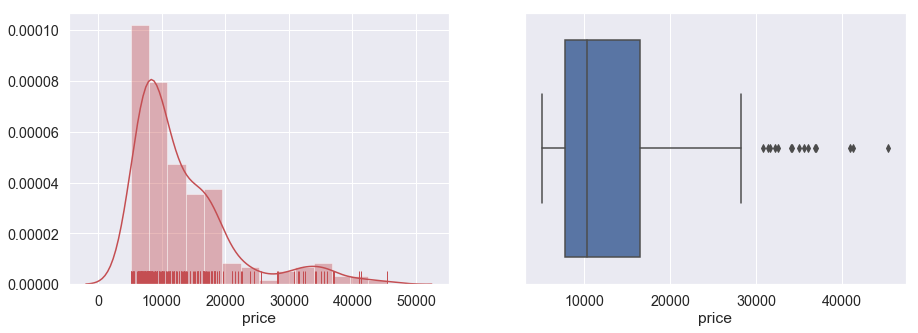

In [715]:
# Let's see the distribution of 'price'
print(DFCarPrices['price'].describe())

fig_1 = plt.figure(figsize=(15,5))
sns.set(font_scale=1.3)

plt.subplot(121)
sns.distplot(DFCarPrices['price'], rug=True, color="r")

plt.subplot(122)
sns.boxplot(DFCarPrices['price'])
plt.show()

Looking at above Car Price distribution
- there are some high value cars (possibly luxury ones) in comparison to median price value 10295.
- most of the prices are between range 7788 - 16503
- There are outliers, high value cars but there is avalid reason for such cars to be expensive. These are not due to errors or exception. These are just high price luxury cars.


,count,mean,max,std
carname,,,,
toyota,32,9885.812500,17669.0,3204.982114
nissan,18,10415.666667,19699.0,4477.394200
mazda,17,10652.882353,18344.0,3975.682094
mitsubishi,13,9239.769231,14869.0,3042.998690
honda,13,8184.692308,12945.0,2061.672112
volkswagen,12,10077.500000,13845.0,2178.549872
subaru,12,8541.250000,11694.0,1940.191468
peugeot,11,15489.090909,18150.0,2246.749673
volvo,11,18063.181818,22625.0,3314.650263


Text(0,0.5,'price')

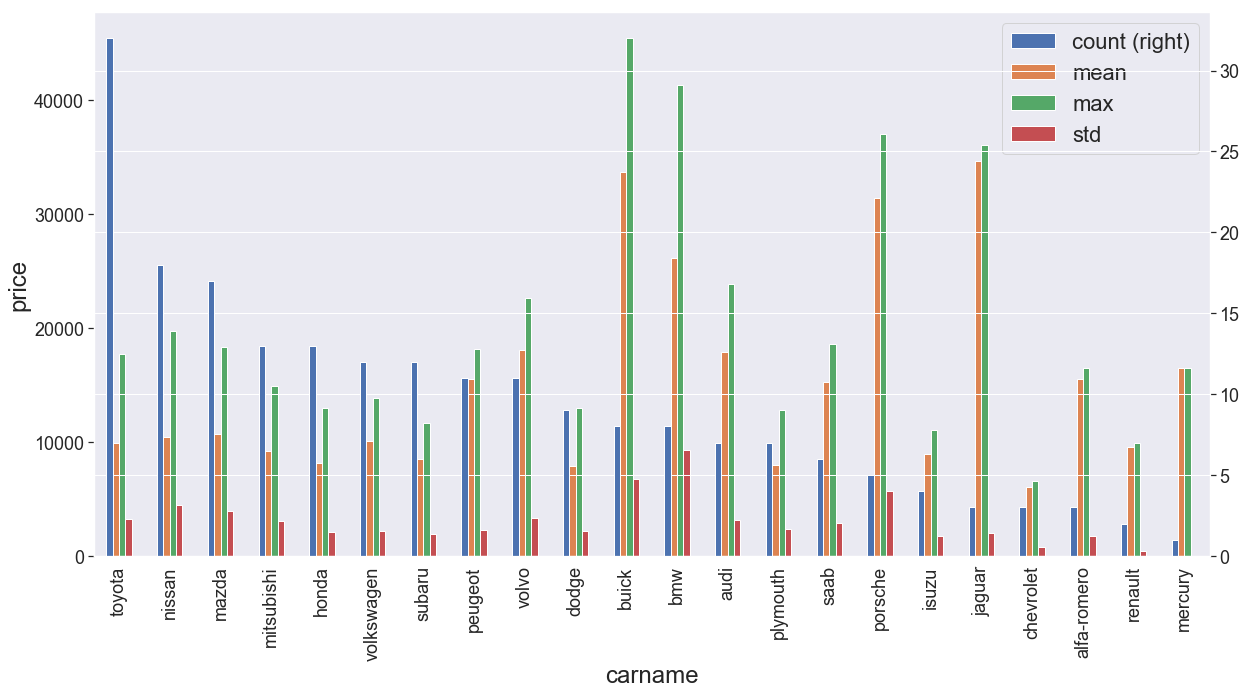

In [716]:
# Lets see how car brands are places against prices
car_gp = DFCarPrices.groupby('carname')['price'].agg(['count','mean','max', 'std']).sort_values(by='count', ascending = False)
display(car_gp)

sns.set()
sns.set(font_scale=2)
car_gp.plot(kind='bar', figsize=(20,10),fontsize=18, secondary_y= 'count').set_ylabel('price')

- Toyota cars are maximum in number
- Buick, BMW, Porsche, Jaguar, Audi, Volvo cars are the costliest cars
- BMW, Buick, Porsche, Nissan, Majda, Volvo have the highest variation in price.

In [717]:
# Let see the pair plot of all numerical variables in the dataset

#get all the mumerical columns first
num_cols = list(DFCarPrices.select_dtypes(exclude='object').columns)
num_cols.remove('car_id')
num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [718]:
# Define a functioin to measure correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.2f}".format(r), #unicode code for lowercase rho (ρ)
                xy=(.1, .9), xycoords=ax.transAxes)

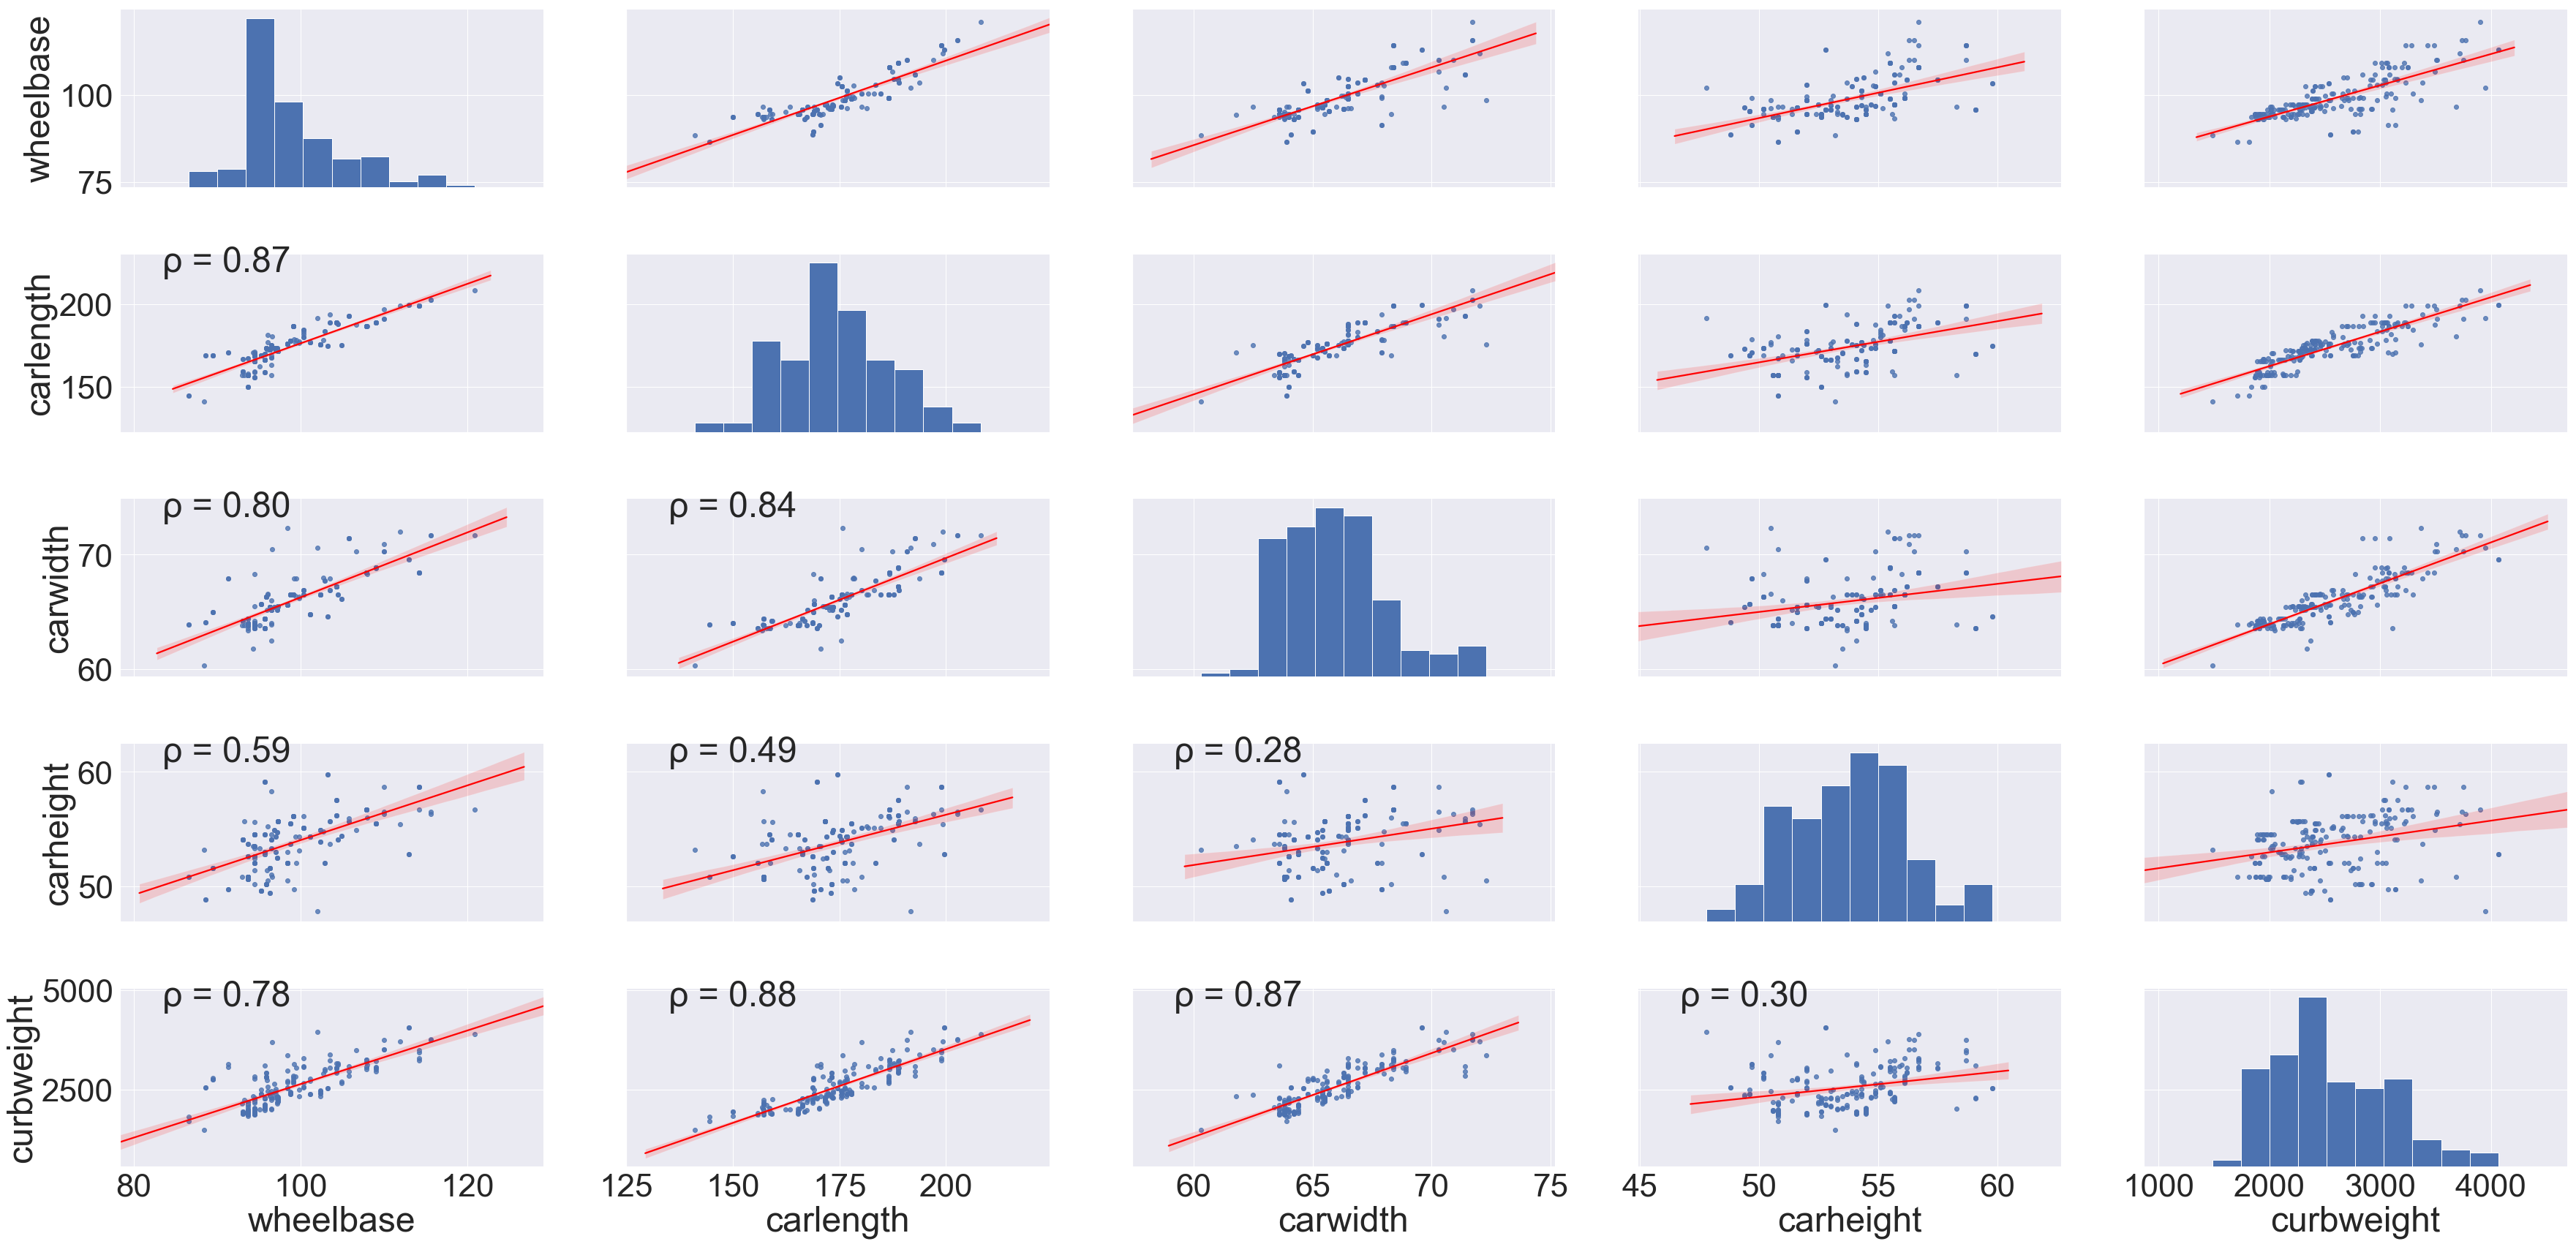

In [719]:
# let's check how the car dimensional variables are related to each other 
sns.set(font_scale=4)
sns.pairplot(data=DFCarPrices,vars=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight'],
             kind='reg', height=5, aspect=2, plot_kws={'line_kws':{'color':'red'}}
            ).map_lower(corrfunc)

##### As expected, 'wheelbase', 'carlength', 'carwidth' and 'curbweight' are quite related to each other

### Derived Variables

##### sizeratio = wheelbase / carwidth

In [720]:
# Lets use derived variable, sizeratio = wheelbase/ carwidth 
 
DFCarPrices['sizeratio'] = DFCarPrices['wheelbase']/ DFCarPrices['carwidth']

DFCarPrices.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname,sizeratio
0,1,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1.382215
1,2,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1.382215
2,3,verysafe,fuel_gas,aspiration_std,doors_two,hatchback,drive_rwd,engine_front,94.5,171.2,65.5,52.4,2823,enginetype_ohcv,6,152,fuelsys_mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1.442748
3,4,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_fwd,engine_front,99.8,176.6,66.2,54.3,2337,enginetype_ohc,4,109,fuelsys_mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1.507553
4,5,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_4wd,engine_front,99.4,176.6,66.4,54.3,2824,enginetype_ohc,5,136,fuelsys_mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1.496988


##### carvolume = carlength x carwidth x carheight 

In [721]:
# Lets use another derived variable, carvolume = carlength * carwidth * carheight 
 
DFCarPrices['carvolume'] = DFCarPrices['carlength'] * DFCarPrices['carwidth'] * DFCarPrices['carheight']

DFCarPrices.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname,sizeratio,carvolume
0,1,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1.382215,528019.904
1,2,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1.382215,528019.904
2,3,verysafe,fuel_gas,aspiration_std,doors_two,hatchback,drive_rwd,engine_front,94.5,171.2,65.5,52.4,2823,enginetype_ohcv,6,152,fuelsys_mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1.442748,587592.640
3,4,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_fwd,engine_front,99.8,176.6,66.2,54.3,2337,enginetype_ohc,4,109,fuelsys_mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1.507553,634816.956
4,5,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_4wd,engine_front,99.4,176.6,66.4,54.3,2824,enginetype_ohc,5,136,fuelsys_mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1.496988,636734.832


##### passengersafe = carlength x curbweight

In [722]:
# Research shows that car safety is in general directly related to length and weight.
# Higher the car length or car weight, safer it is for passengers 
# Let's derive car passengersafe indicator as 
# passengersafe = length*weight and standardize it later

DFCarPrices['passengersafe'] = DFCarPrices['carlength'] * DFCarPrices['curbweight']

#let's standardize the values
std_val = DFCarPrices['passengersafe'].std()
DFCarPrices['passengersafe'] = DFCarPrices['passengersafe']/std_val

DFCarPrices.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname,sizeratio,carvolume,passengersafe
0,1,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1.382215,528019.904,3.523516
1,2,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1.382215,528019.904,3.523516
2,3,verysafe,fuel_gas,aspiration_std,doors_two,hatchback,drive_rwd,engine_front,94.5,171.2,65.5,52.4,2823,enginetype_ohcv,6,152,fuelsys_mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1.442748,587592.640,3.959306
3,4,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_fwd,engine_front,99.8,176.6,66.2,54.3,2337,enginetype_ohc,4,109,fuelsys_mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1.507553,634816.956,3.381068
4,5,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_4wd,engine_front,99.4,176.6,66.4,54.3,2824,enginetype_ohc,5,136,fuelsys_mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1.496988,636734.832,4.085637


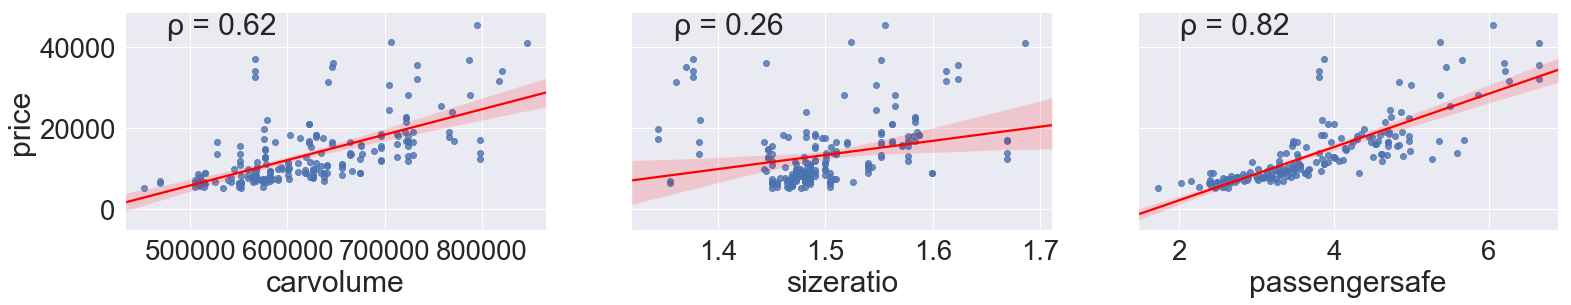

In [723]:
# Let's plot 'price' vs 'sizeratio', 'carvolume' and 'passengersafe' drived variables
sns.set()
sns.set(font_scale=2.5)

sns.pairplot(data=DFCarPrices,
             y_vars=['price'],
             x_vars=['carvolume', 'sizeratio', 'passengersafe'],
                     kind='reg', height=5, aspect=1.5, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

- passengersafe looks to be a good measure of car price
- carvolume reasonable relates to price but seems there are other factors affecting, possibly accessories etc.
- sizeratio didnot not turn out to be a good measure. Let's keep it for the time being.

In [724]:
# sizeratio does not add any value, let's remove it
DFCarPrices.drop(['sizeratio'], axis=1, inplace=True)

In [725]:
DFCarPrices['passengersafe'].describe()

count    205.000000
mean       3.689842
std        1.000000
min        1.720023
25%        2.890960
50%        3.473958
75%        4.352147
max        6.648767
Name: passengersafe, dtype: float64

In [726]:
# convert passengersafe to a categorical variable as
DFCarPrices['passengersafe'] = DFCarPrices['passengersafe'].apply(lambda x:
                                                       'psngr-safe' if x <= 3.5
                                                       else
                                                       'very-psngr-safe' if x <= 4.5
                                                       else
                                                       'high-psngr-safe')

In [727]:
DFCarPrices.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname,carvolume,passengersafe
0,1,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,528019.904,very-psngr-safe
1,2,safe,fuel_gas,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,528019.904,very-psngr-safe
2,3,verysafe,fuel_gas,aspiration_std,doors_two,hatchback,drive_rwd,engine_front,94.5,171.2,65.5,52.4,2823,enginetype_ohcv,6,152,fuelsys_mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,587592.640,very-psngr-safe
3,4,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_fwd,engine_front,99.8,176.6,66.2,54.3,2337,enginetype_ohc,4,109,fuelsys_mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,634816.956,psngr-safe
4,5,safe,fuel_gas,aspiration_std,doors_four,sedan,drive_4wd,engine_front,99.4,176.6,66.4,54.3,2824,enginetype_ohc,5,136,fuelsys_mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,636734.832,very-psngr-safe


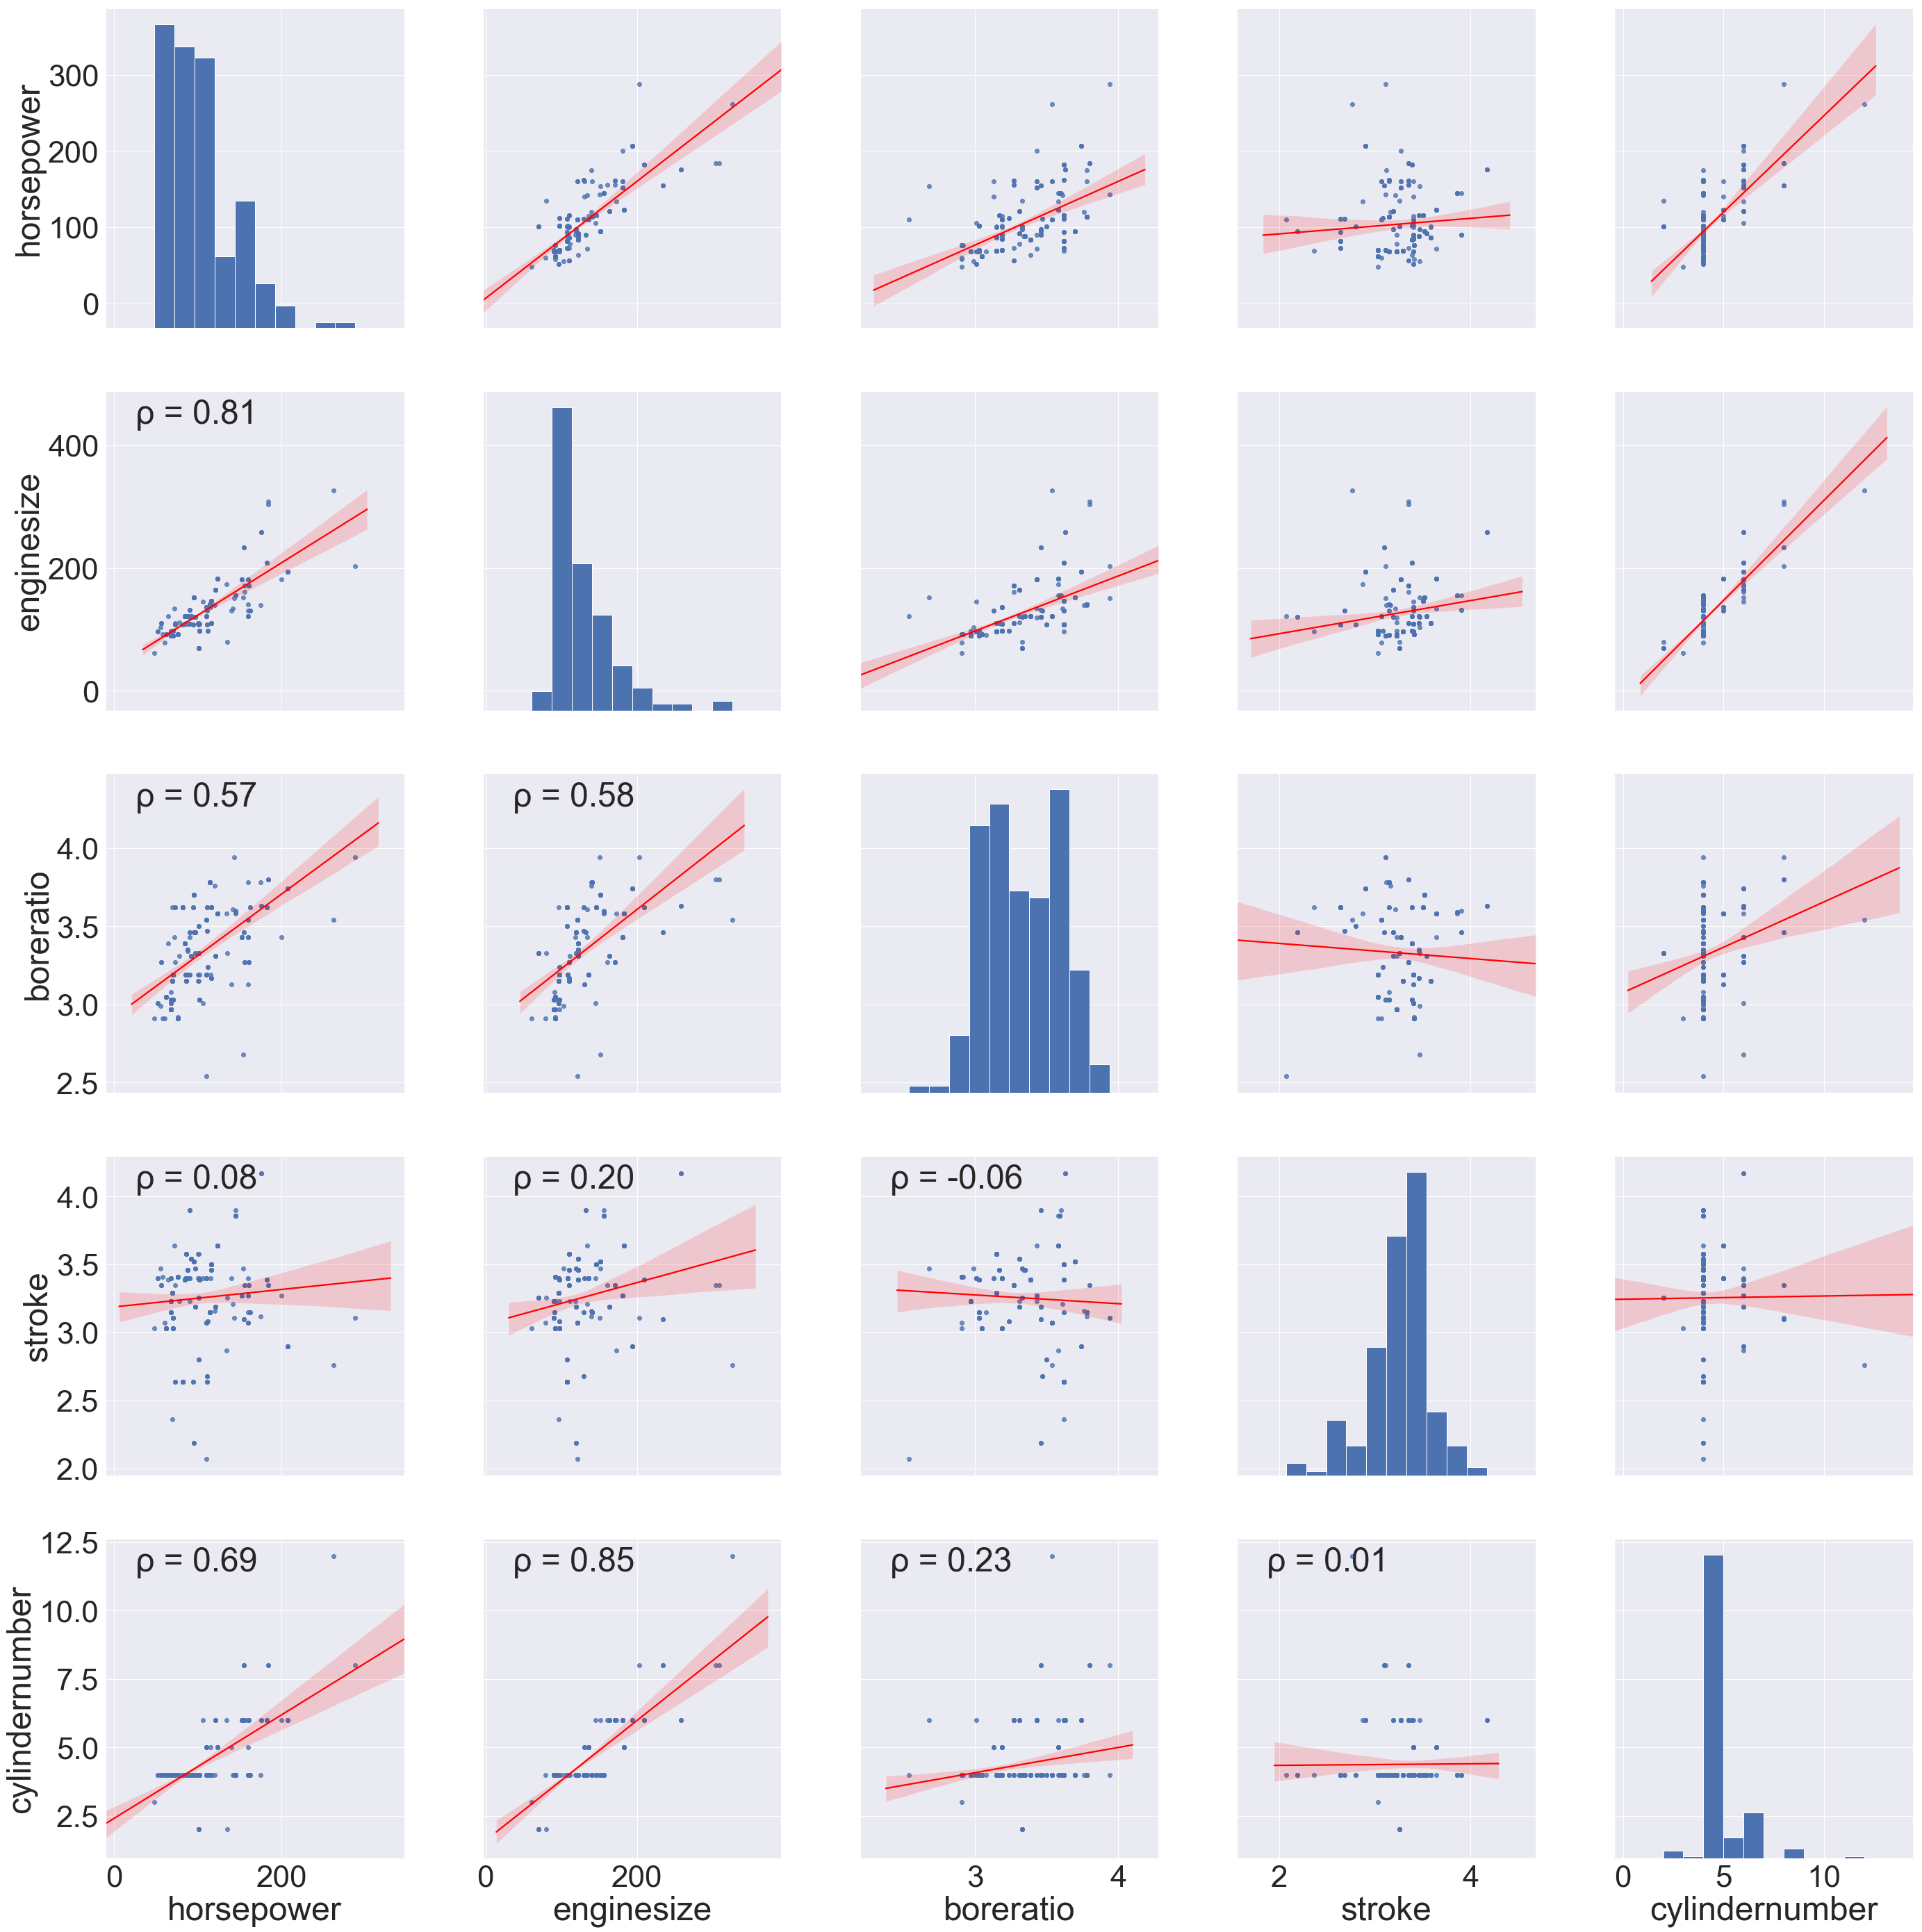

In [728]:
# 'Lets continue analysis for other car power related variables
sns.set()
sns.set(font_scale=4)

sns.pairplot(data=DFCarPrices,
             vars=['horsepower','enginesize','boreratio', 'stroke', 'cylindernumber'], 
             kind='reg', height=8, aspect=1,plot_kws={'line_kws':{'color':'red'}}
            ).map_lower(corrfunc)

- enginesize has high relationship with horsepower and cylindernumber
- enginesize and boreratio also have somewhat positive relationship
- cylindernumber and horsepower also seem to have good relation

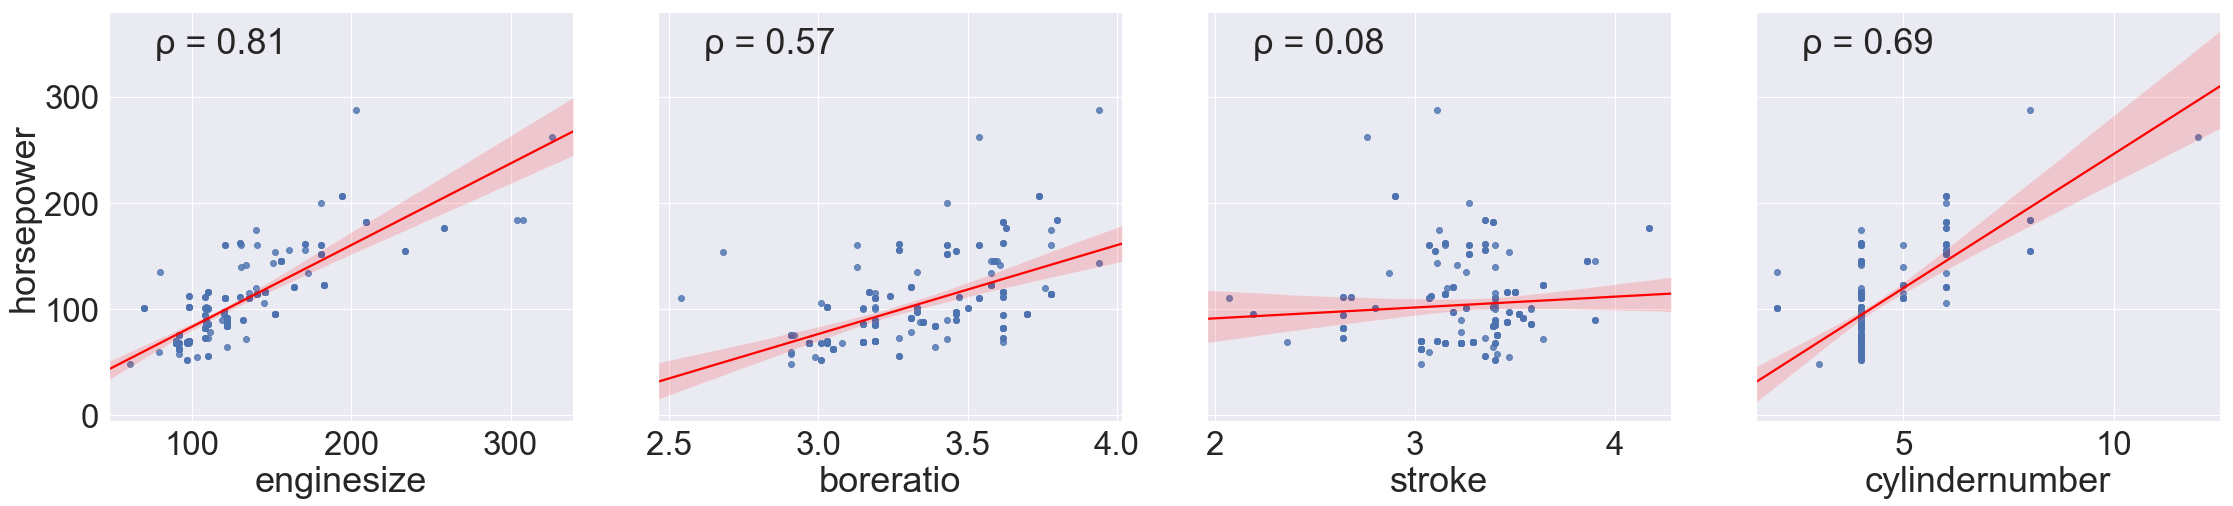

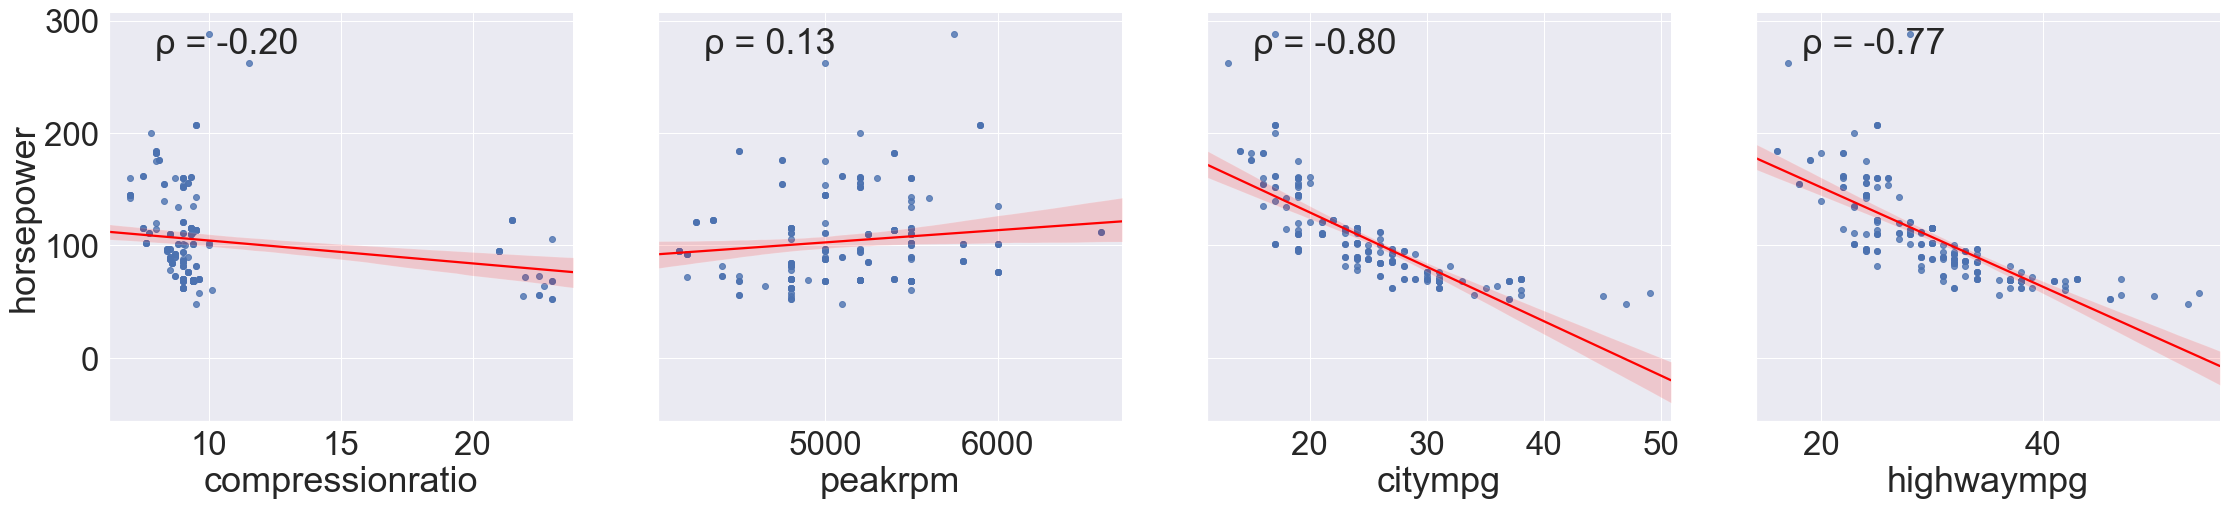

In [729]:
# 'Lets continue analysis for car power related variables
# see how horsepower is placed against other 
sns.set()
sns.set(font_scale=3)

sns.pairplot(data=DFCarPrices,
             y_vars=['horsepower'],
             x_vars=['enginesize','boreratio', 'stroke', 'cylindernumber'], 
             kind='reg', height=8, aspect=1, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

sns.pairplot(data=DFCarPrices,
             y_vars=['horsepower'],
             x_vars=['compressionratio','peakrpm', 'citympg', 'highwaympg'],
             kind='reg', height=8, aspect=1, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

- 'horsepower' seems to have good positive relationship with enginesize.       
- And, a negative relationship both citympg and highwaympg. 
- There is enough indication for relatioship between boreratio and cylindernumber as well.

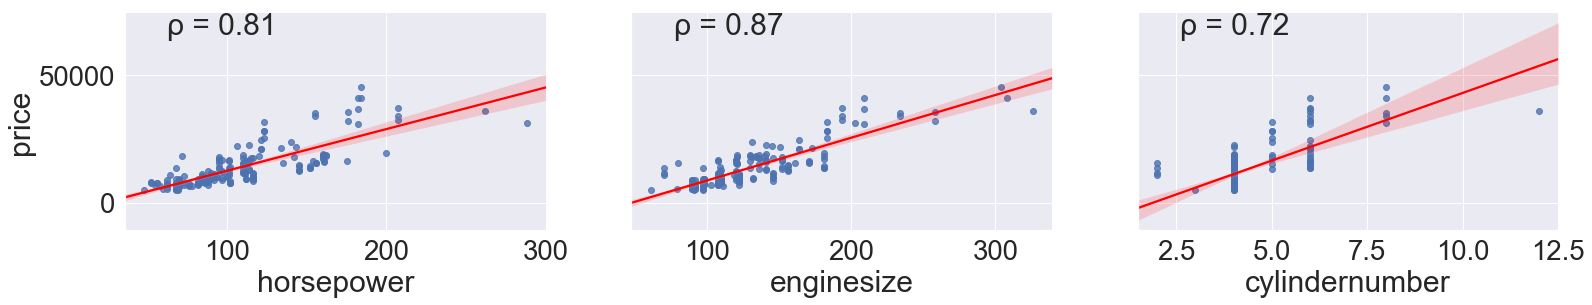

In [730]:
# Let's check the relationship between 'price' and 'horsepower','enginesize' 
sns.set()
sns.set(font_scale=2.5)

sns.pairplot(data=DFCarPrices,
             y_vars=['price'],
             x_vars=['horsepower', 'enginesize', 'cylindernumber'],
                     kind='reg', height=5, aspect=1.5, plot_kws={'line_kws':{'color':'red'}}).map(corrfunc)

- All variables enginesize, horsepower and cylindernumber have good relationship to 'price' and one is a good representative of other
- Let's keep the both leave for later which one gets eliminated in further analaysis.

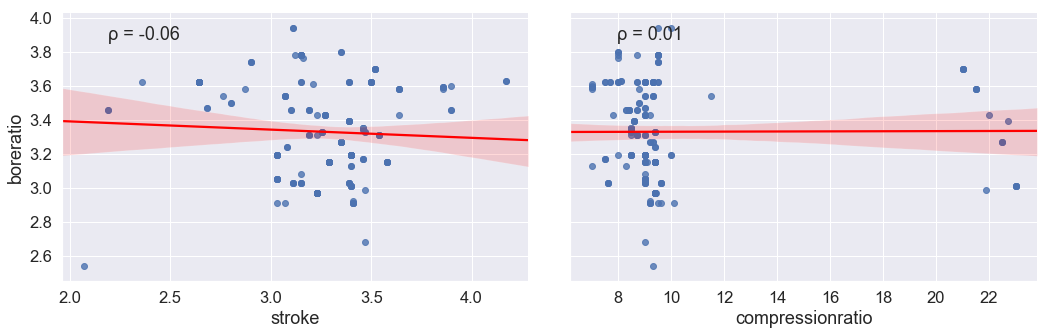

In [731]:
# Let's also check if there is a relationship between boreratio and stroke
sns.set()
sns.set(font_scale=1.5)

sns.pairplot(data=DFCarPrices,
             y_vars=['boreratio'],
             x_vars=['stroke', 'compressionratio'],                     
             kind='reg', height=5, aspect=1.5, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

Not much of a relationship between boreratio and stroke, compressionratio.

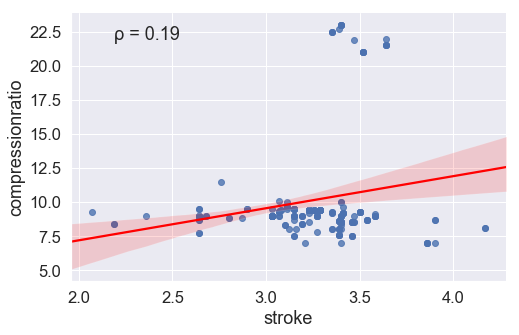

In [732]:
sns.pairplot(data=DFCarPrices,
             x_vars=['stroke'],
             y_vars=['compressionratio'],                     
             kind='reg', height=5, aspect=1.5, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

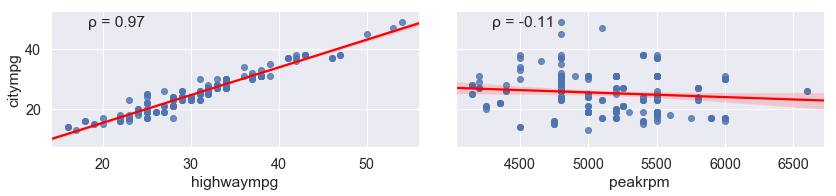

In [733]:
# 'Lets see car performance variables for mileage
sns.set()
sns.set(font_scale=1.3)

sns.pairplot(data=DFCarPrices,
             y_vars=['citympg'],
             x_vars=['highwaympg','peakrpm'],
             kind='reg', height=3, aspect=2, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

- Pretty high linear positive relatioinship between highwaympg and citympg
- Not so much relationship with peakrpm

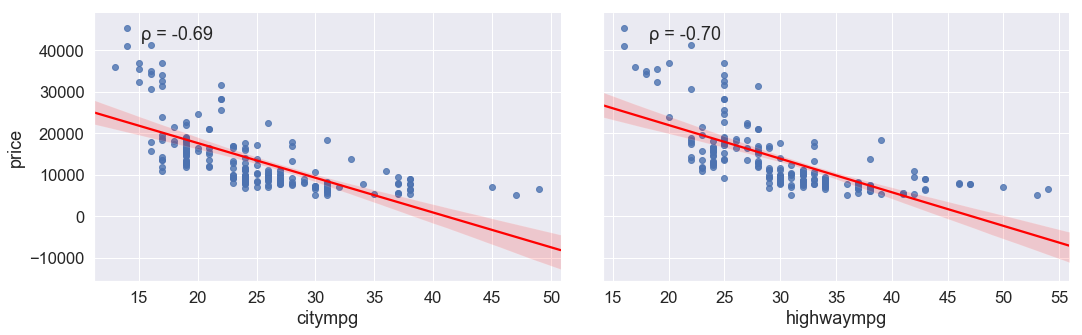

In [734]:
# 'Lets see car performance variables gainst price
sns.set()
sns.set(font_scale=1.5)

sns.pairplot(data=DFCarPrices,
             y_vars=['price'],
             x_vars=['citympg','highwaympg'],
             kind='reg', height=5, aspect=1.5, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

- So, both citympg and highwaympg seems have similar relationship with price
- between citympg and higfhwaympg we need only one variable
- Let's see which one gets eliminated later

In [735]:
# Lets see price variation within each category for all categorical variables
cat_cols = list(DFCarPrices.select_dtypes(include='object').columns)
price_cat = cat_cols.copy()
price_cat.append('price')

# Will add carname later, there are more categorical values in this variable
cat_cols.remove('carname')

In [736]:
cat_cols

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'passengersafe']

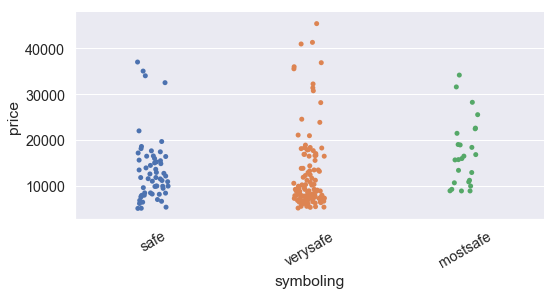

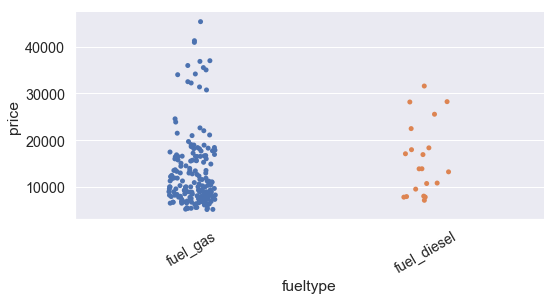

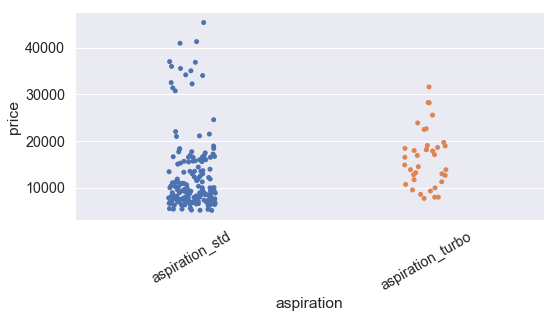

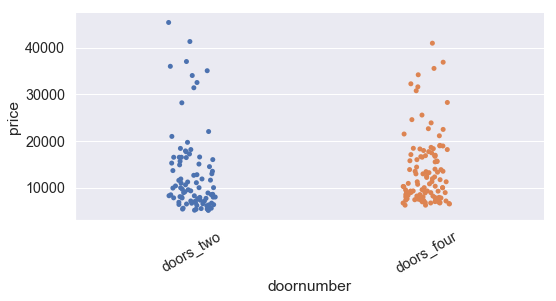

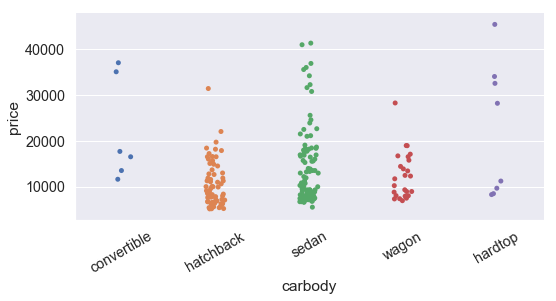

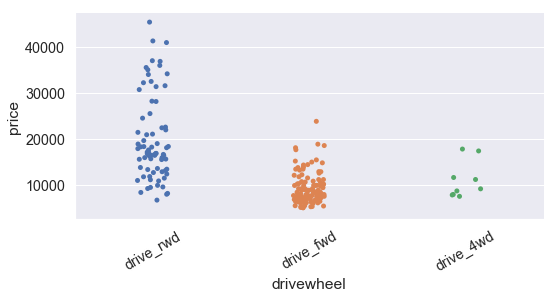

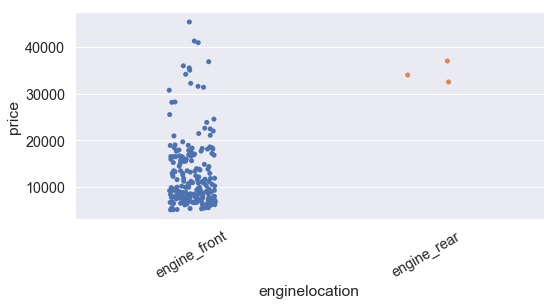

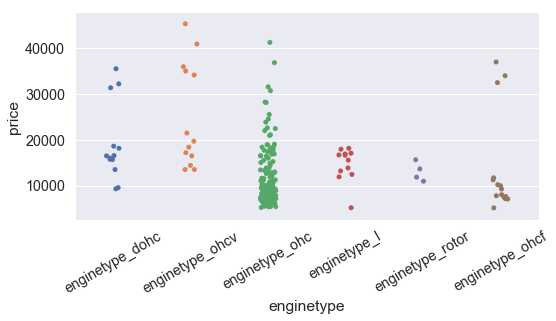

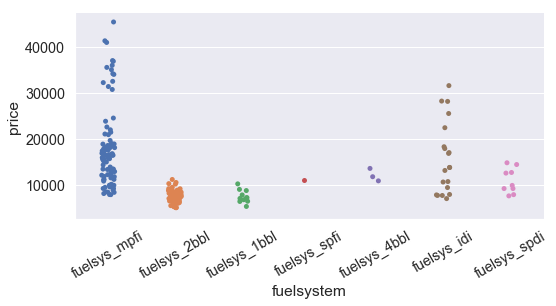

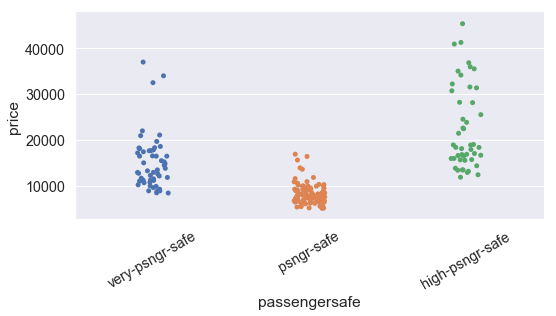

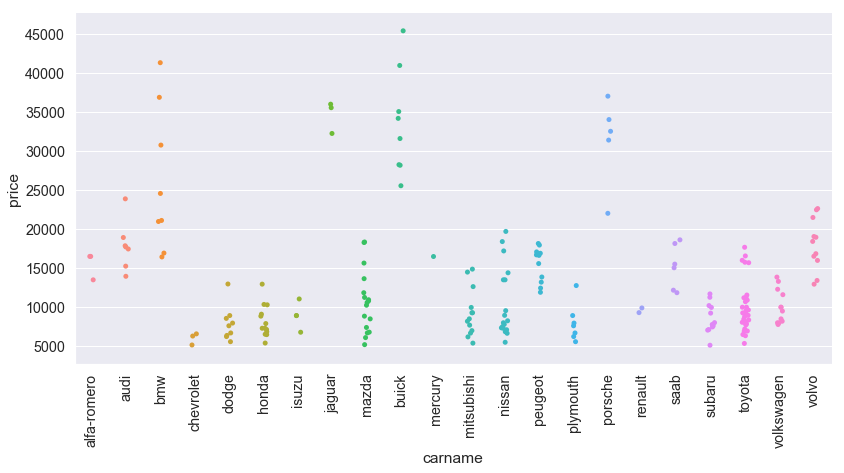

In [737]:
sns.set(font_scale=1.3)

for var in cat_cols:
     sns.catplot(x=var, y='price', data=DFCarPrices[price_cat], kind='strip', height=4, aspect=2).set_xticklabels(rotation=30)

sns.catplot(x='carname', y='price', data=DFCarPrices[price_cat], kind='strip', height=6, aspect=2).set_xticklabels(rotation=90)
        
plt.show()

Looking at the above plots, we can say that
- There is considerable price variation within most of the categorical variables.
- Car population with enginelocation 'front' is highly dense than the 'rear' value. Possibly this variable is of not much use. we will keept it for the time being as see how it stays in the model.

Based on Car name and prices we could see the below
    - Most expensive - bmw, jaguar, buick, porsche
    - Medium expensive - alfa-romero, audi, volvo
    - Low-Medium expensive - all others

###### But better is to see number of cars produced for each carname

### Derived Variable 'car_production'

In [738]:
DFcar_production = DFCarPrices.groupby(['carname'])['carname'].count().sort_values(
    ascending=False).to_frame("car_production").reset_index()

DFcar_production

,carname,car_production
0,toyota,32
1,nissan,18
2,mazda,17
3,honda,13
4,mitsubishi,13
5,subaru,12
6,volkswagen,12
7,volvo,11
8,peugeot,11
9,dodge,9


In [739]:
DFcar_production.describe()

,car_production
count,22.000000
mean,9.318182
std,6.937725
min,1.000000
25%,4.250000
50%,8.000000
75%,12.000000
max,32.000000


In [740]:
DFCarPrices = pd.merge(DFCarPrices, DFcar_production[['carname', 'car_production']], how='left', on='carname')

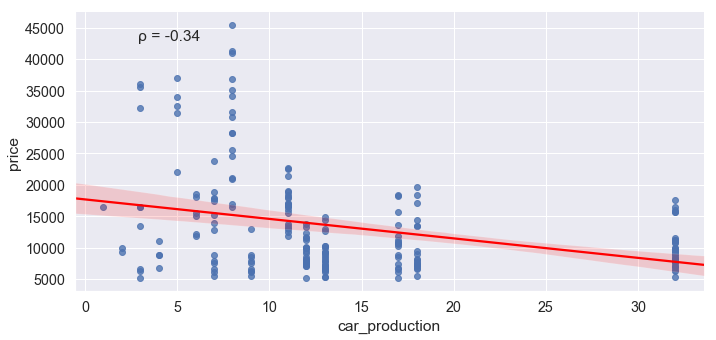

In [741]:
# Lets see price variation against car production counts 
sns.set()
sns.set(font_scale=1.3)

sns.pairplot(data=DFCarPrices,
             y_vars=['price'],
             x_vars=['car_production'],
             kind='reg', height=5, aspect=2, plot_kws={'line_kws':{'color':'red'}}
            ).map(corrfunc)

##### Car production counts have an indicative variation for price in a negative relationship
##### In the context even correlation value of -0.34 is somewhat significant
- The high production cars are definitely clustered around low price
- The low production and medium production cars have much greater price variation.

In [742]:
# lets remove vbariable carname from data set
# While it may be required to see which cars are palced where w.r.t pricing but in a general
# car pricing model we will not use car brand
# Now that we have 'car_name' variable, drop 'carname' column
DFCarPrices.drop(['carname'], axis=1, inplace=True)

In [743]:
cat_cols

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'passengersafe']

In [744]:
def replacewith_dummies(dfmain, feature):
    # First create a dummy variables from teh given feature
    dfdummy = pd.get_dummies(dfmain[feature], drop_first=True)
    
    # Concatenate the new dummy variables to the master data set
    dfmain = pd.concat([dfmain,dfdummy],axis=1)
    
    # Drop variable from main data set as we have created the dummies for it
    dfmain.drop([feature],axis=1,inplace=True)
    
    return dfmain

In [745]:
# Let's creating a dummy variable for 'fueltype'
DFCarPrices = replacewith_dummies(DFCarPrices, 'fueltype')

In [746]:
# Check dummy variables creation worked fine
DFCarPrices.head()

,car_id,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,passengersafe,car_production,fuel_gas
0,1,safe,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,very-psngr-safe,3,1
1,2,safe,aspiration_std,doors_two,convertible,drive_rwd,engine_front,88.6,168.8,64.1,48.8,2548,enginetype_dohc,4,130,fuelsys_mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,very-psngr-safe,3,1
2,3,verysafe,aspiration_std,doors_two,hatchback,drive_rwd,engine_front,94.5,171.2,65.5,52.4,2823,enginetype_ohcv,6,152,fuelsys_mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,very-psngr-safe,3,1
3,4,safe,aspiration_std,doors_four,sedan,drive_fwd,engine_front,99.8,176.6,66.2,54.3,2337,enginetype_ohc,4,109,fuelsys_mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,psngr-safe,7,1
4,5,safe,aspiration_std,doors_four,sedan,drive_4wd,engine_front,99.4,176.6,66.4,54.3,2824,enginetype_ohc,5,136,fuelsys_mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,very-psngr-safe,7,1


In [747]:
# Let's create dummy variables for remaining categorical variables
cat_cols_other = cat_cols.copy()
cat_cols_other.remove('fueltype')

In [748]:
for var in cat_cols_other:
    DFCarPrices = replacewith_dummies(DFCarPrices, var)

In [749]:
DFCarPrices.head()

,car_id,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume,car_production,fuel_gas,safe,verysafe,aspiration_turbo,doors_two,hardtop,hatchback,sedan,wagon,drive_fwd,drive_rwd,engine_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,psngr-safe,very-psngr-safe
0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,3,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,7,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,5,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,7,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [750]:
# Let separate the car_id variable, will merge it again later 
LiCarid = DFCarPrices['car_id']

In [751]:
# Let's drop car_id as we have derived carbrand
DFCarPrices.drop(['car_id'], axis=1, inplace=True)

In [752]:
# Lets make price as first column
cols = DFCarPrices.columns.tolist()
cols.insert(0, cols.pop(cols.index('price')))

In [753]:
DFCarPrices = DFCarPrices.loc[:, cols]

In [754]:
DFCarPrices.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,car_production,fuel_gas,safe,verysafe,aspiration_turbo,doors_two,hardtop,hatchback,sedan,wagon,drive_fwd,drive_rwd,engine_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,psngr-safe,very-psngr-safe
0,13495.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,528019.904,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,528019.904,3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,16500.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,587592.640,3,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,13950.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,634816.956,7,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,17450.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,636734.832,7,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [755]:
DFCarPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 42 columns):
price               205 non-null float64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
carvolume           205 non-null float64
car_production      205 non-null int64
fuel_gas            205 non-null uint8
safe                205 non-null uint8
verysafe            205 non-null uint8
aspiration_turbo    205 non-null uint8
doors_two           205 non-null uint8
hardtop            

### Step_5 Rescaling Features

Since there are large number of categorical variabels let's normalize using method                                                                       
[ x - min(x) ] / [max(x) - min(x)]

In [756]:
#DFCarPrices = DFCarPrices.apply(lambda x: (x - x.mean()) / x.std())

In [757]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [758]:
# Let's standardize all columns in Data set
DFCarPrices = DFCarPrices.apply(normalize) 

In [759]:
DFCarPrices.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,car_production,fuel_gas,safe,verysafe,aspiration_turbo,doors_two,hardtop,hatchback,sedan,wagon,drive_fwd,drive_rwd,engine_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,psngr-safe,very-psngr-safe
0,0.207959,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.191621,0.064516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.282558,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.191621,0.064516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.282558,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.343065,0.064516,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.219254,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.463117,0.193548,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.306142,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.467993,0.193548,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [760]:
# Lets' add car_id column back
DFCarPrices.insert(loc=0, column='car_id', value=LiCarid)

In [761]:
DFCarPrices.head()

,car_id,price,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carvolume,car_production,fuel_gas,safe,verysafe,aspiration_turbo,doors_two,hardtop,hatchback,sedan,wagon,drive_fwd,drive_rwd,engine_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,psngr-safe,very-psngr-safe
0,1,0.207959,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.191621,0.064516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,0.282558,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.191621,0.064516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,0.282558,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.343065,0.064516,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,0.219254,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.463117,0.193548,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0.306142,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.467993,0.193548,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Step_6 Splitting Data into Training and Testing Sets

In [762]:
from sklearn import model_selection

In [763]:
# Lets prepare X columns and y columns for modelling 
x_cols = list(DFCarPrices.keys())
x_cols.remove('car_id')
x_cols.remove('price')

In [764]:
# Putting feature variable to X
X = DFCarPrices[x_cols]

# Putting response variable to y
y = DFCarPrices['price']

In [765]:
#Let's split the data into 7:3 ratio for Training and Testing puprose
test_size = 0.30
seed = 5

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=test_size,
                                                                    random_state=seed)

### Step_7 Feature Engineering

##### Recursive Feature Elimination - RFE

In [766]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [767]:
# Running RFE with the output number of the variable equal to 15 (Total 50)
lm = LinearRegression()
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [768]:
# Printing the RFE results
print(rfe.support_)           
print(rfe.ranking_)  

[ True  True False  True  True False  True  True  True  True False  True
  True  True  True  True  True False False False False False False False
 False False  True  True  True False False  True  True False False  True
 False False False False False]
[ 1  1  5  1  1  3  1  1  1  1  4  1  1  1  1  1  1 19 17 20 21  8  9 10  2
 14  1  1  1  7 11  1  1 18 12  1 13  6 22 15 16]


In [769]:
cols_rank1 = X_train.columns[rfe.support_]
cols_rank1

Index(['wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'carvolume', 'car_production', 'fuel_gas', 'drive_rwd',
       'engine_rear', 'enginetype_l', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsys_idi'],
      dtype='object')

### Step_6 Building a linear Regression model

In [770]:
import statsmodels.api as sm 

In [771]:
# Let's create training data set with RFE selected variables
X_train_rfe = X_train[cols_rank1]

In [772]:
# We will add a constant column to our data set
X_train_rfe = sm.add_constant(X_train_rfe)    

In [773]:
# Let's create the first fitted model
LMCarPrice_01 = sm.OLS(y_train, X_train_rfe).fit()

In [774]:
# Let's check the summary of the linear model built above
print(LMCarPrice_01.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     71.81
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.25e-57
Time:                        22:25:25   Log-Likelihood:                 209.49
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     123   BIC:                            -319.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3422      0.082  

### LMCarPrice_01
    - R^2 and adjusted R^2 value are both high
    - most of the p-values are quite low i.e. p < 0.05. However some have p-value > 0.05. 

Let's check VIF values and see which variabels can be eliminated

##### Calculating Variation Inflation Factor - VIF

In [775]:
# Lets have complete Training datasets with independent and dependent features
DFTrain = pd.concat([ y_train, X_train_rfe], axis=1)
DFTrain.head()

,price,const,wheelbase,carlength,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,carvolume,car_production,fuel_gas,drive_rwd,engine_rear,enginetype_l,enginetype_ohcv,enginetype_rotor,fuelsys_idi
149,0.163249,1.0,0.300292,0.485075,0.591667,0.450737,0.177358,0.771429,0.271429,0.04375,0.265306,0.277778,0.184211,0.433849,0.354839,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.041383,1.0,0.224490,0.441791,0.475000,0.329325,0.188679,0.550000,0.552381,0.09375,0.265306,0.305556,0.342105,0.284068,0.096774,1.0,1.0,0.0,0.0,0.0,0.0,0.0
62,0.127278,1.0,0.355685,0.547761,0.641667,0.357642,0.230189,0.607143,0.628571,0.10000,0.265306,0.361111,0.421053,0.517515,0.516129,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.168363,1.0,0.620991,0.680597,0.741667,0.594259,0.222642,0.657143,0.533333,0.08750,0.346939,0.166667,0.210526,0.690026,0.322581,1.0,1.0,0.0,1.0,0.0,0.0,0.0
89,0.009458,1.0,0.230321,0.361194,0.558333,0.155547,0.135849,0.435714,0.580952,0.15000,0.428571,0.500000,0.552632,0.310454,0.548387,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [776]:
# UDF for calculating VIF value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [777]:
cols_rank1_price = list(cols_rank1.copy())
cols_rank1_price.append('price')
# Calculating Vif value for model LMCarPrice_01
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
13,fuel_gas,257.12
19,fuelsys_idi,156.97
7,compressionratio,86.41
11,carvolume,77.70
1,carlength,35.22
9,citympg,27.54
10,highwaympg,24.62
3,curbweight,20.25
4,enginesize,11.90
0,wheelbase,9.55


##### There are very high VIF values.
##### To remove variables we will follow below order 
    - First - remove variables with - High VIF and High p-value (i.e low significance)
    - Second- remove variables with - High p-value (i.e low significance)
    - Third - remove variables with - High VIF (even if low p-value, statistically significant)
    
We will iterate until we have, say 5-7 variables

### Correlation matrix

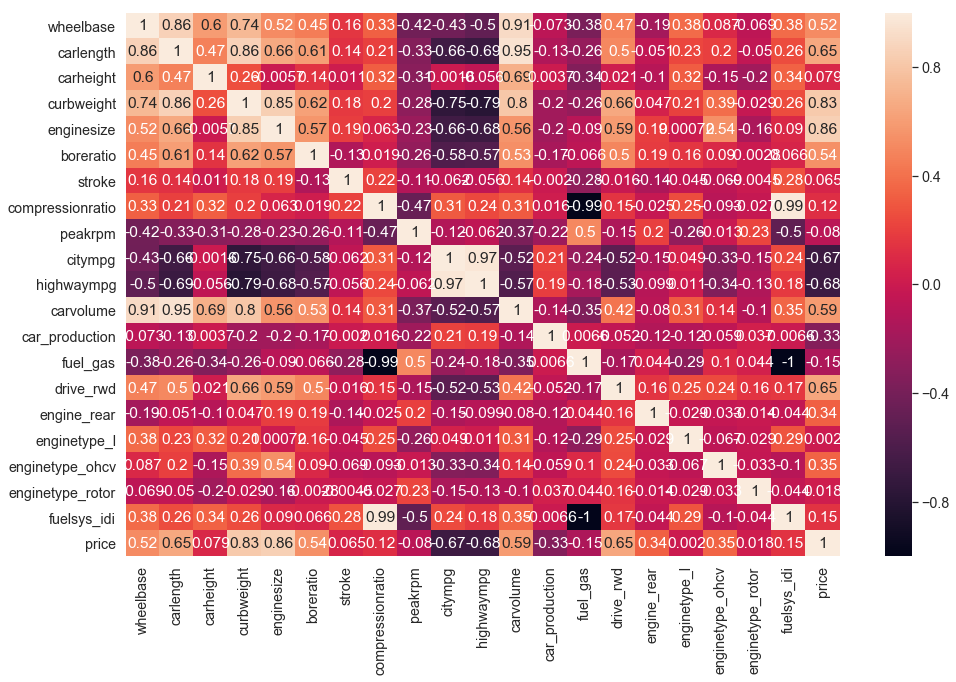

In [778]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     
sns.heatmap(DFTrain[cols_rank1_price].corr(),annot = True)

In the above correlation heatmap, we can see there are some high correlation values
- fuelsys_idi and compressionratio has almost perfect linera relationship
- Carvolume, as expected, as alomost perfect linear relationship with carlength and carwidth

In [779]:
# Let's remove variable curbweight (high p and vif value) and build the model again
X_train_rfe = X_train_rfe.drop('curbweight', 1)

### LMCarPrice_02

In [780]:
# Let's create the model
LMCarPrice_02 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_02.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     75.86
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.54e-58
Time:                        22:25:26   Log-Likelihood:                 209.00
No. Observations:                 143   AIC:                            -380.0
Df Residuals:                     124   BIC:                            -323.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3800      0.071  

In [781]:
cols_rank1_price.remove('curbweight')

In [782]:
# Calculating Vif value for LMCarPrice_02
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
12,fuel_gas,187.29
18,fuelsys_idi,127.95
6,compressionratio,84.04
10,carvolume,64.12
1,carlength,34.04
8,citympg,27.31
9,highwaympg,23.94
0,wheelbase,8.89
2,carheight,8.51
3,enginesize,8.01


### LMCarPrice_03

In [783]:
# Let's remove variable wheelbase (high p and vif value) and build the model again
X_train_rfe = X_train_rfe.drop('wheelbase', 1)

In [784]:
# Let's create the model 
LMCarPrice_03 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_03.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     79.37
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.87e-58
Time:                        22:25:27   Log-Likelihood:                 207.70
No. Observations:                 143   AIC:                            -379.4
Df Residuals:                     125   BIC:                            -326.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3610      0.070  

In [785]:
cols_rank1_price.remove('wheelbase')

In [786]:
# Calculating Vif value for LMCarPrice_03
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
11,fuel_gas,185.40
17,fuelsys_idi,123.69
5,compressionratio,81.55
9,carvolume,54.88
0,carlength,33.98
7,citympg,26.08
8,highwaympg,23.49
1,carheight,8.40
2,enginesize,7.63
3,boreratio,2.73


##### In LMCarPrice_03, p-value and vif value for fuelgas is quite high, let's remove it.

### LMCarPrice_04

In [787]:
# Let's remove variable fuel_gas 
X_train_rfe = X_train_rfe.drop('fuel_gas', 1)


In [788]:
# Let's create the model 
LMCarPrice_04 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_04.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     79.37
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.87e-58
Time:                        22:25:27   Log-Likelihood:                 207.70
No. Observations:                 143   AIC:                            -379.4
Df Residuals:                     125   BIC:                            -326.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2844      0.073  

LMCarPrice_04
    - P-values for peakrpm, citympg, highwaympg are quite high
    - R^2 and adjusted R^2 values are high and close

In [789]:
cols_rank1_price.remove('fuel_gas')

In [790]:
# Calculating Vif value for LMCarPrice_04
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
9,carvolume,254.57
0,carlength,207.42
5,compressionratio,132.03
8,highwaympg,128.42
7,citympg,103.63
16,fuelsys_idi,93.52
1,carheight,48.98
4,stroke,28.15
2,enginesize,27.90
3,boreratio,21.63


VIF values of highwaympg and citympg are quite high
Let's remove citympg 

### LMCarPrice_05

In [791]:
# Let's remove variable citympg 
X_train_rfe = X_train_rfe.drop('citympg', 1)

In [792]:
# Let's create the model 
LMCarPrice_05 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_05.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.45e-58
Time:                        22:25:27   Log-Likelihood:                 205.42
No. Observations:                 143   AIC:                            -376.8
Df Residuals:                     126   BIC:                            -326.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2434      0.071  

LMCarPrice_05
- Variable 'highwaympg' still has high p-value

In [793]:
cols_rank1_price.remove('citympg')

In [794]:
# Calculating Vif value for LMCarPrice_05
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
8,carvolume,254.42
0,carlength,206.55
5,compressionratio,131.90
15,fuelsys_idi,93.48
1,carheight,48.18
4,stroke,27.78
2,enginesize,27.39
7,highwaympg,23.18
3,boreratio,21.37
6,peakrpm,8.70


- highwaympg has high VIF value
- Let's remove highwaympg as well

### LMCarPrice_06

In [795]:
# Let's remove variable highwaympg and build the model again
X_train_rfe = X_train_rfe.drop('highwaympg', 1)

In [796]:
# Let's create the model 
LMCarPrice_06 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_06.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     87.94
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.87e-59
Time:                        22:25:27   Log-Likelihood:                 205.18
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     127   BIC:                            -331.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2679      0.060  

LMCarPrice_06
- All variables have p-values < 0.05.
- Let's see the VIF values and adjust model accordingly

In [797]:
cols_rank1_price.remove('highwaympg')

In [798]:
# Calculating Vif value for LMCarPrice_06
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
7,carvolume,227.36
0,carlength,203.83
5,compressionratio,70.65
14,fuelsys_idi,57.42
1,carheight,42.90
2,enginesize,25.91
4,stroke,20.69
3,boreratio,19.14
6,peakrpm,8.63
8,car_production,4.19


There are some high VIF values. Let's remove one variable at a time.
- Lets' remove carvolume, which is a derived variable

### LMCarPrice_07

In [799]:
# Let's remove variable carvolume and build the model again
X_train_rfe = X_train_rfe.drop('carvolume', 1)

In [800]:
# Let's create the model
LMCarPrice_07 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_07.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     77.71
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.81e-55
Time:                        22:25:27   Log-Likelihood:                 192.23
No. Observations:                 143   AIC:                            -354.5
Df Residuals:                     128   BIC:                            -310.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1139      0.057  

In [801]:
DFTrain = pd.concat([ y_train, X_train_rfe], axis=1)

LMCarPrice_07
- carlength p-value has become higher > 0.05

In [802]:
cols_rank1_price.remove('carvolume')

In [803]:
# Calculating Vif value for LMCarPrice_07
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
5,compressionratio,59.84
13,fuelsys_idi,47.43
0,carlength,35.02
2,enginesize,23.39
4,stroke,17.06
3,boreratio,16.91
1,carheight,14.02
6,peakrpm,8.61
7,car_production,3.93
8,drive_rwd,3.44


LMCarPrice_07
- Let's remove carlength and develop the model again

### LMCarPrice_08

In [804]:
# Let's remove variable carlength and build the model again
X_train_rfe = X_train_rfe.drop('carlength', 1)

In [805]:
# Let's create the model 
LMCarPrice_08 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_08.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     82.39
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.35e-56
Time:                        22:25:27   Log-Likelihood:                 190.74
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     129   BIC:                            -312.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1175      0.057  

LM_model_08
- p-values are all low again

In [806]:
cols_rank1_price.remove('carlength')

In [807]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
4,compressionratio,58.94
12,fuelsys_idi,46.64
3,stroke,17.04
1,enginesize,16.83
2,boreratio,15.14
0,carheight,8.72
5,peakrpm,8.52
6,car_production,3.92
7,drive_rwd,3.44
10,enginetype_ohcv,2.05


LMCarPrice_08
- Let's remove compressionratio as it ahs high VIF value
- R^2 and Adjusted R^2 both are quite high, around 0.89, and close to each other 

### LMCarPrice_09

In [808]:
# Let's remove variable compressionratio and build the model again
X_train_rfe = X_train_rfe.drop('compressionratio', 1)

In [809]:
# Let's create the model 
LMCarPrice_09 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_09.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     80.28
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.02e-54
Time:                        22:25:27   Log-Likelihood:                 183.52
No. Observations:                 143   AIC:                            -341.0
Df Residuals:                     130   BIC:                            -302.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0052      0.049  

LMCarPrice_09
- P-values are all low.
- Let see VIF valeus and remove some more variables as R^2 and adjusted R^2 valeus are still high

In [810]:
cols_rank1_price.remove('compressionratio')

In [811]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
3,stroke,16.89
1,enginesize,16.76
2,boreratio,15.10
0,carheight,8.35
4,peakrpm,6.68
6,drive_rwd,3.43
5,car_production,3.39
9,enginetype_ohcv,2.05
11,fuelsys_idi,1.92
8,enginetype_l,1.46


### LMCarPrice_10

In [812]:
# Let's remove variable stroke and build the model again
X_train_rfe = X_train_rfe.drop('stroke', 1)

In [813]:
# Let's create the model 
LMCarPrice_10 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     78.05
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.52e-52
Time:                        22:25:27   Log-Likelihood:                 175.84
No. Observations:                 143   AIC:                            -327.7
Df Residuals:                     131   BIC:                            -292.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1101      0.042  

 LMCarPrice_10
 - p-value for boreratio has become > 0.05

In [814]:
cols_rank1_price.remove('stroke')

In [815]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
2,boreratio,15.10
1,enginesize,12.10
0,carheight,8.14
3,peakrpm,4.35
5,drive_rwd,3.10
4,car_production,2.85
8,enginetype_ohcv,1.84
10,fuelsys_idi,1.64
7,enginetype_l,1.45
9,enginetype_rotor,1.29


- Looks like both VIF and po-value is high for boreratio
- Lets' remove boreratio

### LMCarPrice_11

In [816]:
# Let's remove variable boreratio and build the model again
X_train_rfe = X_train_rfe.drop('boreratio', 1)

In [817]:
# Let's create the model 
LMCarPrice_11 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     85.86
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.85e-53
Time:                        22:25:27   Log-Likelihood:                 175.37
No. Observations:                 143   AIC:                            -328.7
Df Residuals:                     132   BIC:                            -296.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1297      0.037  

LMCarPrice_11
- fuelsys_idi is at borderline for p-value.
- R^2 and adjusted R^2 values are still high

In [818]:
cols_rank1_price.remove('boreratio')

In [819]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
1,enginesize,7.34
0,carheight,6.93
2,peakrpm,4.07
4,drive_rwd,3.09
3,car_production,2.73
7,enginetype_ohcv,1.65
9,fuelsys_idi,1.63
6,enginetype_l,1.42
8,enginetype_rotor,1.25
5,engine_rear,1.16


### LMCarPrice_12

In [820]:
# Let's remove variable fuelsys_idi and build the model again
X_train_rfe = X_train_rfe.drop('fuelsys_idi', 1)

In [821]:
# Let's create the model 
LMCarPrice_12 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     92.98
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.82e-53
Time:                        22:25:27   Log-Likelihood:                 173.32
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     133   BIC:                            -297.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1136      0.036  

LMCarPrice_12
- peakrpm p-value ahs increased considerably. Let's remove this variable.
- R^2 and adjusted R^2 still have high values

In [822]:
cols_rank1_price.remove('fuelsys_idi')

In [823]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
1,enginesize,7.27
0,carheight,6.06
2,peakrpm,3.37
4,drive_rwd,3.08
3,car_production,2.73
7,enginetype_ohcv,1.63
6,enginetype_l,1.41
8,enginetype_rotor,1.24
5,engine_rear,1.16


### LMCarPrice_13

In [824]:
# Let's remove variable peakrpm 
X_train_rfe = X_train_rfe.drop('peakrpm', 1)

In [825]:
# Let's create the model 
LMCarPrice_13 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.47e-53
Time:                        22:25:27   Log-Likelihood:                 172.26
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     134   BIC:                            -299.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0759      0.024  

LMCarPrice_13
- p-values are < 0.05 and R^@ and adjusted R^2 values are also looking good.

In [826]:
cols_rank1_price.remove('peakrpm')

In [827]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
1,enginesize,7.02
0,carheight,5.08
3,drive_rwd,3.04
2,car_production,2.67
6,enginetype_ohcv,1.63
5,enginetype_l,1.36
7,enginetype_rotor,1.12
4,engine_rear,1.11


LMCarPrice_13
- even thoiough soem VIF values for some variable are relatively higher
- P-values are quite low
- I will conclude for the time being
- This model will be used for predictions and see how it behaves.

### LMCarPrice_14

In [828]:
# Let's remove variable drive_rwd 
X_train_rfe = X_train_rfe.drop('drive_rwd', 1)

In [829]:
# Let's create the model 
LMCarPrice_14 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.52e-51
Time:                        22:25:27   Log-Likelihood:                 162.77
No. Observations:                 143   AIC:                            -309.5
Df Residuals:                     135   BIC:                            -285.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0981      0.025  

In [830]:
cols_rank1_price.remove('drive_rwd')

In [831]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
0,carheight,4.86
1,enginesize,4.42
2,car_production,2.66
5,enginetype_ohcv,1.61
4,enginetype_l,1.19
3,engine_rear,1.11
6,enginetype_rotor,1.02


### LMCarPrice_15

In [832]:
# Let's remove variable enginetype_l 
X_train_rfe = X_train_rfe.drop('enginetype_l', 1)

In [833]:
# Let's create the model 
LMCarPrice_15 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.07e-51
Time:                        22:25:27   Log-Likelihood:                 161.39
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     136   BIC:                            -288.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0939      0.025  

In [834]:
cols_rank1_price.remove('enginetype_l')

In [835]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
1,enginesize,4.41
0,carheight,4.34
2,car_production,2.55
4,enginetype_ohcv,1.61
3,engine_rear,1.11
5,enginetype_rotor,1.02


### LMCarPrice_16

In [836]:
# Let's remove variable enginetype_ohcv 
X_train_rfe = X_train_rfe.drop('enginetype_ohcv', 1)

In [837]:
# Let's create the model 
LMCarPrice_16 = sm.OLS(y_train, X_train_rfe).fit()

# Let's check the summary of the linear model built above
print(LMCarPrice_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.02e-50
Time:                        22:25:28   Log-Likelihood:                 157.47
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     137   BIC:                            -285.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0860      0.026  

In [838]:
cols_rank1_price.remove('enginetype_ohcv')

In [840]:
# Calculating Vif value for LMCarPrice_08
vif_cal(input_data=DFTrain[cols_rank1_price], dependent_col="price")

,Var,Vif
0,carheight,3.83
1,enginesize,2.85
2,car_production,2.55
3,engine_rear,1.07
4,enginetype_rotor,1.02


### Final Linear Regression equation is
 
- carprice = 
    -             -0.086  
    -             + 0.1358 * carheight
    -             + 1.0315 * enginesize
    -             - 0.1039 * car_production
    -             + 0.2936 * engine_rear
    -             + 0.3012 * enginetype_rotor
 
The car_production is basically tarnsaltes to 
creating demand + marketing + commoditize + Large production units etc.
 
It provides inputs to a new car company to get insights into what makes car production volume and car pricing. Keeping car price low while balancing other factors is the key to sell more cars. 

### Step_8 Making Predictions

##### Making Predictions Using the final model LMCarPrice_13

In [841]:
LM_final_cols = cols_rank1_price
LM_final_cols.remove('price')

In [842]:
# Creating X_test_rfe data set by dropping variables from X_test
X_test_rfe = X_test[LM_final_cols]

In [843]:
# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [844]:
# Making predictions
y_pred = LMCarPrice_16.predict(X_test_rfe)

### Step_9 Model Evaluation

In [845]:
# Now let's check how well our model is able to make predictions.
X_test_rfe.shape

(62, 6)

Text(0,0.5,'Car Price')

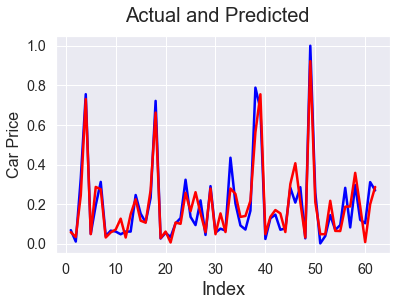

In [846]:
# Actual and Predicted
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                           # Y-label

Text(0,0.5,'y_pred')

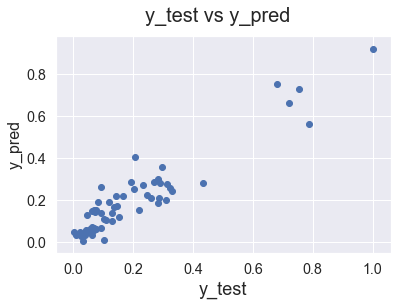

In [847]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

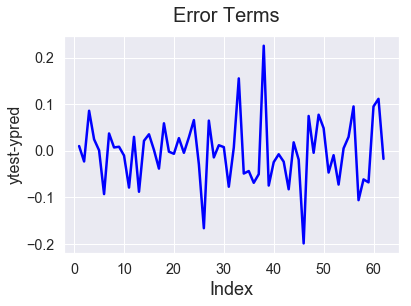

In [848]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

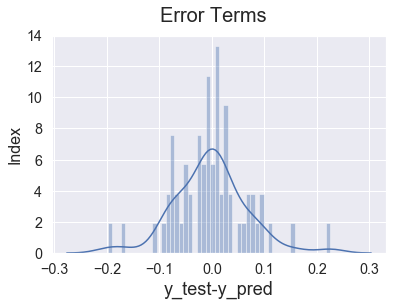

In [849]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [850]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0694014840694


##### The model is looking good, RMSE value is quite low

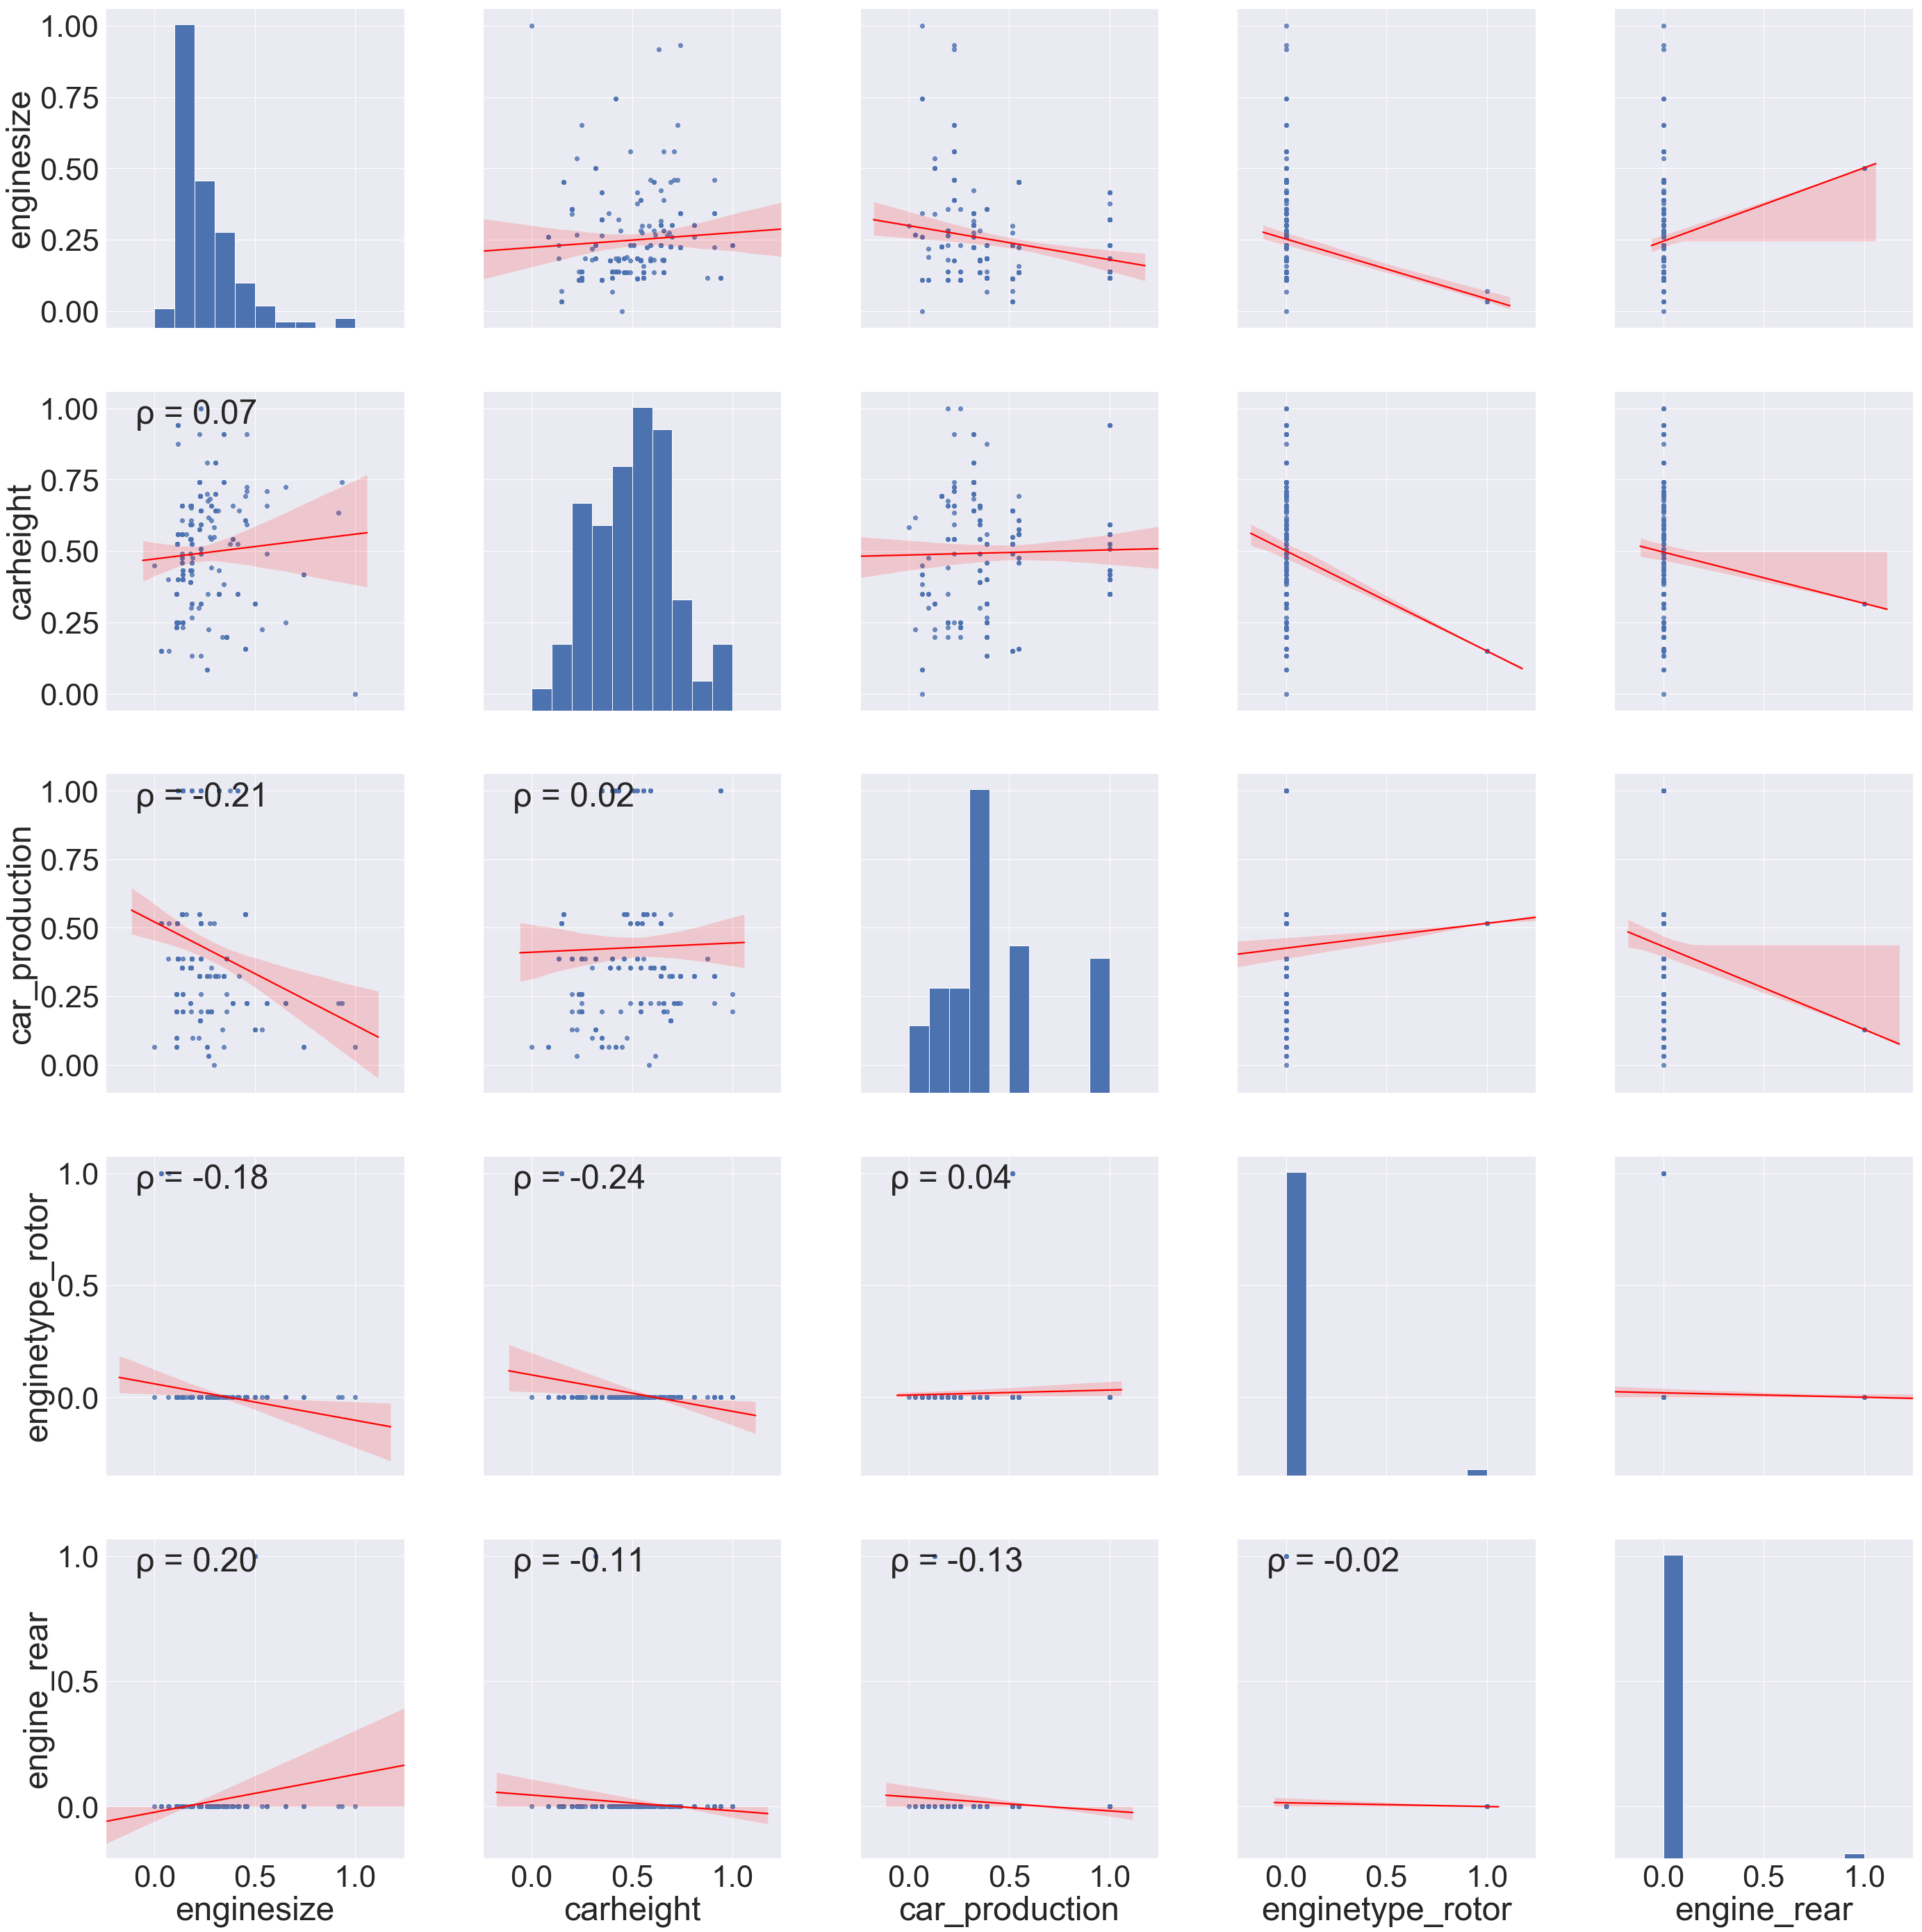

In [851]:
# 'Lets see if we have all independent variables in the final model
sns.set()
sns.set(font_scale=4)

sns.pairplot(data=DFCarPrices,
             vars=['enginesize', 'carheight','car_production',
                   'enginetype_rotor','engine_rear'], 
             kind='reg', height=8, aspect=1,plot_kws={'line_kws':{'color':'red'}}
            ).map_lower(corrfunc)

In [852]:
## End of program